# Título Proyecto: " Predicción de 'Gana el Equipo Local' con una Probabilidad Mínima del 70% ajustado a un  Intervalo de Confianza al 95%"
### Autor: Ervar Luis Molina

Índice
1. Resumen
2. DDL
3. EDA
4. Algoritmos ML
5. Primeras conclusiones

# 1- Resumen

**Apuestas Digitales en el Fútbol Argentino y Desarrollo de un Notebook en Python para Predicciones**

Las apuestas digitales en el ámbito del fútbol argentino han experimentado un crecimiento exponencial en los últimos años, ofreciendo a los simpatizantes y a curiosos, una nueva dimensión de emoción y participación en este evento deportivo. Dicho fenómeno ha llevado a muchos entusiastas a explorar estrategias para mejorar sus posibilidades de éxito en las apuestas, y una de las aproximaciones más intrigantes que se proponen en este proyecto.

**El objetivo** se centra en la posibilidad de establecer un notebook para intentar predecir con un 70% de probabilidad la victoria del equipo local en partidos de fútbol argentino, proporcionando así, en un futuro,  una herramienta práctica para aquellos interesados en incursionar en las apuestas digitales de manera informada.

El proceso de desarrollo de un modelo predictivo involucra la recopilación y análisis de datos históricos de partidos de fútbol argentino, que en este caso se utilizara una muestra con el data set utilizado entre los años 2017 y 2022. Mediante la creación de un modelo que permita confirmar o refrutar la hipótesis del título del proyecto se analizarán las variables de estudio, como el rendimiento histórico de los equipos locales, estadísticas de goles a favor y en contra, tarjetas rojas, porcentaje final de posesión de la pelota,  así como factores externos como proporcion de jugadores con mayor habilidad en pierna izquierda, su altura y edad para establecer criterios de regresión apropiados. Los datos obtenidos se utilizarán para entrenar un modelo de aprendizaje automático que pueda discernir patrones y correlaciones significativas.

Es crucial destacar que el objetivo del modelo no es garantizar el éxito en todas las apuestas, sino proporcionar una guía informada basada en datos históricos y patrones identificados. La precisión del 70% se establece como una meta inicial alta, siendo un umbral que sugiere un rendimiento significativamente superior al azar.

La aplicación práctica de este modelo en las apuestas digitales implica la evaluación continua de su rendimiento y la adaptación a cambios en el entorno deportivo. Es importante tener en cuenta que factores imprevistos, como cambios de entrenadores o sorpresas en la alineación, pueden influir en los resultados y requerir ajustes en el modelo.

En resumen, este proyecto busca fusionar la emoción de las apuestas digitales en el fútbol argentino con la precisión de la ciencia de datos. El desarrollo de un notebook en Python para predecir la probabilidad de victoria del equipo local proporciona una herramienta valiosa para aquellos que buscan maximizar sus posibilidades de éxito en este fascinante mundo de apuestas deportivas digitales.

# 2- DDL ( Data Definition Lenguage)

### Carga de librerias, módulos y montaje de dateset desde Google Drive

In [1]:
!pip install pingouin
!pip install statsmodels
!pip install graphviz
!pip install scikit-learn matplotlib mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 5.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

from sklearn.tree import export_graphviz
from IPython.display import display, Image
import graphviz
import os
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree



In [3]:
from google.colab import drive
drive.mount ('/content/gdrive')
import os


Mounted at /content/gdrive


In [4]:
%cd '/content/gdrive/MyDrive/Data Science/Clases y entregas DS2024/Data sets'
datos= pd.read_excel('afa_2015_2022_spa_V3.xlsx')
datos.head(6)
print(f'La dimensión de este dataframe es: {datos.shape}')

/content/gdrive/MyDrive/Data Science/Clases y entregas DS2024/Data sets
La dimensión de este dataframe es: (1513, 34)


### Transformación externa

Lo primera modificación al dataset original se realizó de manera externa a google.colab  y se eliminó una serie de más de 1000 filas, con atributos vacios,  porque superaban ampliamente los protocolos de buenas practicas para la utilización estadística de los datos. Esto se realizo con Excel y se transformó la extensión .csv a .xlsx, que es el utilizado para este proyecto.

In [5]:
# Convierto la columna fecha_encuentro en tipo datetime para luego poder dividirla
datos['fecha_encuentro']= pd.to_datetime(datos['fecha_encuentro'])
# Divido en mes y año
datos['Mes'] = datos['fecha_encuentro'].dt.month
datos['Año'] = datos['fecha_encuentro'].dt.year
# Elimino columna 'fecha_encuentro', perdió su utilidad,  los datos siguen presentes
#datos=datos.drop('fecha_encuentro', axis=1)

### Información sobre los datos

In [6]:
datos.head(5)

,torneo,fecha,partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local,tiros_arco_local,intentos_local,...,altura_media_visitante,edad_media_visitante,proporcion_zurdos_visitante,resultado,fecha_encuentro,apuesta_local,apuesta_visitante,apuesta_empate,Mes,Año
0,Campeonato 2017/18,13,1,Godoy Cruz,Chacarita,1,0,46.0,2.0,9.0,...,170,24.3,0.210526,L,2018-01-26 19:00:00,1.76,4.88,3.42,1.0,2018.0
1,Campeonato 2017/18,13,2,Tigre,Banfield,1,2,65.0,3.0,15.0,...,180,25.6,0.175000,V,2018-01-26 19:00:00,2.36,3.18,3.08,1.0,2018.0
2,Campeonato 2017/18,13,3,Talleres (C),San Lorenzo,2,0,54.0,5.0,11.0,...,180,26.3,0.288889,L,2018-01-26 21:15:00,2.16,3.58,3.06,1.0,2018.0
3,Campeonato 2017/18,13,4,Lanus,Patronato,1,1,64.0,3.0,4.0,...,179,25.3,0.139535,E,2018-01-27 19:15:00,1.74,5.13,3.36,1.0,2018.0
4,Campeonato 2017/18,13,5,Newells,Arsenal,2,1,57.0,7.0,18.0,...,178,22.9,0.341463,L,2018-01-27 17:00:00,1.82,4.54,3.33,1.0,2018.0


In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   torneo                       1513 non-null   object        
 1   fecha                        1513 non-null   int64         
 2   partido                      1513 non-null   int64         
 3   equipo_local                 1513 non-null   object        
 4   equipo_visitante             1513 non-null   object        
 5   goles_local                  1513 non-null   int64         
 6   goles_visitante              1513 non-null   int64         
 7   posesion_local               1513 non-null   float64       
 8   tiros_arco_local             1513 non-null   float64       
 9   intentos_local               1513 non-null   float64       
 10  faltas_local                 1513 non-null   float64       
 11  tiro_esquina_local           1513 non-null 

In [8]:
datos.describe() #dejar float con un decimal

,fecha,partido,goles_local,goles_visitante,posesion_local,tiros_arco_local,intentos_local,faltas_local,tiro_esquina_local,posesion_visitante,...,valor_mercado_visitante,altura_media_visitante,edad_media_visitante,proporcion_zurdos_visitante,fecha_encuentro,apuesta_local,apuesta_visitante,apuesta_empate,Mes,Año
count,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,...,1.513000e+03,1513.000000,1510.000000,1513.000000,1512,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,14.042300,7.098480,1.290813,0.989425,51.122274,4.410443,13.675479,13.351619,5.409782,48.877065,...,1.613890e+15,178.502313,24.712662,0.225230,2020-07-12 16:51:02.301587456,2.466104,3.869127,3.302447,7.212302,2019.971561
min,1.000000,1.000000,0.000000,0.000000,21.000000,0.000000,1.000000,3.000000,0.000000,18.000000,...,7.950000e+00,170.000000,3.500000,0.113636,2018-01-26 19:00:00,1.150000,1.260000,2.600000,1.000000,2018.000000
25%,8.000000,4.000000,0.000000,0.000000,43.000000,3.000000,10.000000,10.000000,3.000000,41.000000,...,2.660000e+01,178.000000,24.200000,0.183673,2018-12-02 18:47:30,1.890000,2.680000,3.000000,4.000000,2018.000000
50%,15.000000,7.000000,1.000000,1.000000,51.000000,4.000000,13.000000,13.000000,5.000000,49.000000,...,1.177500e+04,178.000000,24.750000,0.230769,2020-02-08 20:42:30,2.280000,3.385000,3.150000,8.000000,2020.000000
75%,20.000000,10.000000,2.000000,2.000000,59.000000,6.000000,17.000000,16.000000,7.000000,57.000000,...,4.482500e+04,179.000000,25.800000,0.260870,2021-12-13 03:07:30,2.830000,4.422500,3.400000,10.000000,2021.000000
max,27.000000,14.000000,8.000000,6.000000,82.000000,13.000000,31.000000,27.000000,16.000000,79.000000,...,4.992500e+16,182.000000,26.700000,0.365385,2022-10-25 20:00:00,11.250000,17.660000,7.670000,12.000000,2022.000000
std,7.367493,3.822823,1.122180,1.038871,10.744396,2.226600,4.717948,3.999085,2.826314,10.744666,...,7.612609e+15,1.320935,1.871161,0.051767,NaN,0.906171,1.878297,0.518345,3.195469,1.574906


In [9]:
datos['equipo_local'].info()
datos['equipo_local'].describe()

distintos_equipos_locales = datos['equipo_local'].unique()
distintos_equipos_locales


<class 'pandas.core.series.Series'>
RangeIndex: 1513 entries, 0 to 1512
Series name: equipo_local
Non-Null Count  Dtype 
--------------  ----- 
1513 non-null   object
dtypes: object(1)
memory usage: 11.9+ KB


array(['Godoy Cruz', 'Tigre', 'Talleres (C)', 'Lanus', 'Newells',
       'Def y Justicia', 'Boca Juniors', 'Argentinos', 'Olimpo', 'Union',
       'Huracan', 'Independiente', 'Atl Tucuman', 'Gimnasia (LP)',
       'Patronato', 'Belgrano', 'Banfield', 'Rosario Central', 'Colon',
       'River Plate', 'Arsenal', 'Estudiantes (LP)', 'San Lorenzo',
       'Racing Club', 'Chacarita', 'Temperley', 'San Martin (SJ)',
       'Velez', 'Aldosivi', 'San Martin (T)', 'Central Cba (SdE)',
       'Sarmiento (J)', 'Platense', 'Barracas Central'], dtype=object)

## Gráficos con libreria Matplotlib y sus módulos

In [10]:
# Set estilo
plt.style.use('dark_background')


### Gráfico 1
### Frecuencia de cantidad de goles en un partido de futbol. Relacionado con todos los partidos de local que fueron disputados por cada equipo del torneo de Primera Division AFA entre 2018 y 2022 y la cantidad de goles convertidos.


In [11]:
# Elijo variables para asignarle atributos para graficar
frec_goles=datos.goles_local.value_counts()
frec_goles.sort_values

<bound method Series.sort_values of goles_local
1    547
0    408
2    343
3    157
4     44
5     13
8      1
Name: count, dtype: int64>

<BarContainer object of 7 artists>

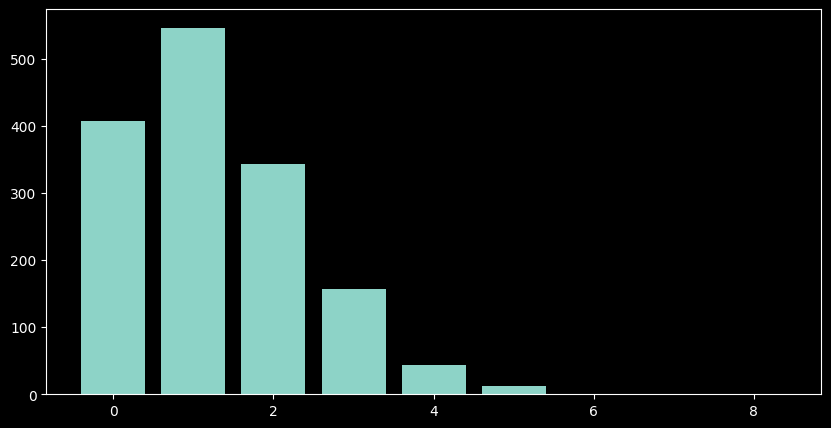

In [12]:
# Frecuencia de goles del local en partidos totales
dib, ax = plt.subplots(figsize=( 10,5) )
ax.bar( frec_goles.index, frec_goles)


### Gráfico 2
### Distribución de resultados en lo partidos totales en el periodo analizado

In [13]:
# Relacion partidos ganados por equipo local vs visitante
resul_part= datos.resultado.value_counts()
resul_part


resultado
L    657
E    452
V    404
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

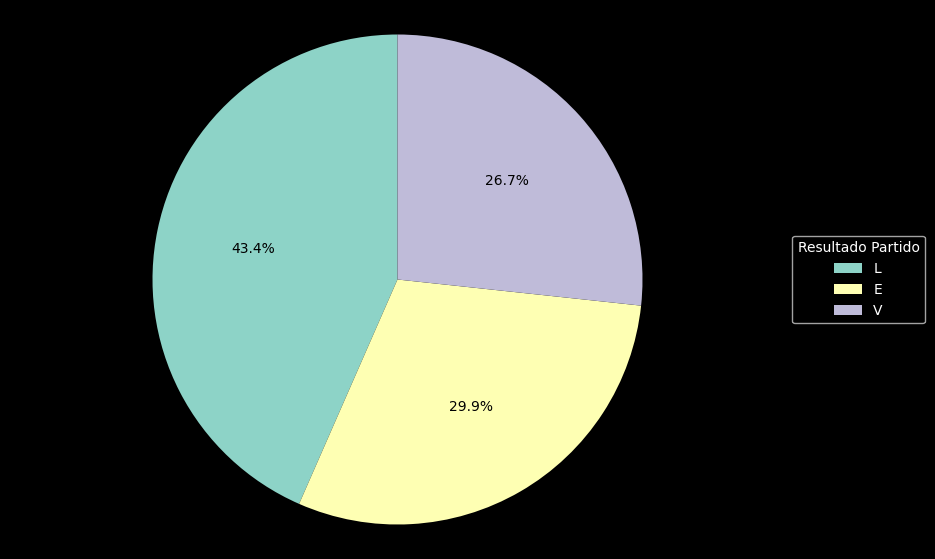

In [14]:
#preparamos variables y creamos una serie para utilizar grafico de tortas
dib, ax= plt.subplots(figsize=(10,7))
ax.pie(resul_part , labels= resul_part.index,autopct='%1.1f%%', startangle=90, textprops={'color':'black'})
ax.axis('equal')
ax.legend(resul_part.index, title="Resultado Partido", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show


### Gráfico 3
### Dos gráficos para analizar la relación entre la  cantidad de goles por partido durante el periodo de análisis, comparando entre partidos de local y visitante.

<function matplotlib.pyplot.show(close=None, block=None)>

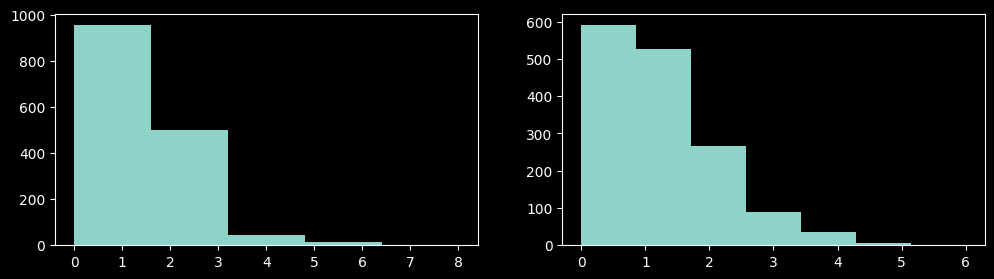

In [15]:
#Cantidad de goles por partido totales, local o visitante
#defino variables
año21 = datos.query("Año == 2021" )
dib, ax = plt.subplots(1,2,figsize=(12, 3))
ax[0].hist(datos['goles_local'],bins=5)
ax[1].hist(datos['goles_visitante'],bins=7)





plt.show


## Visualización con libreria Seaborn


### Gráfico 1
### Porcentaje de posesión de la pelota en los partidos y su relación con el resultado final del, segun la frecuencia de partidos

<Axes: xlabel='posesion_local', ylabel='Count'>

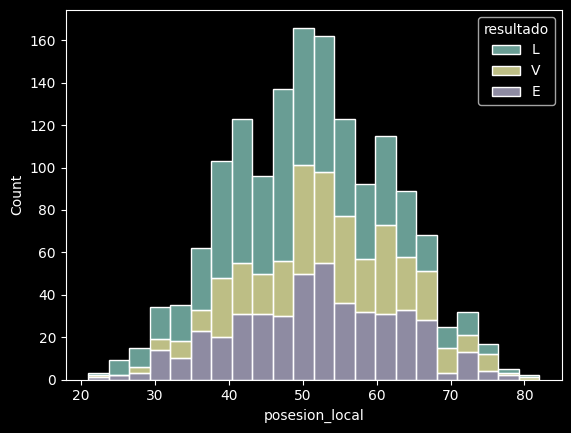

In [16]:
#frecuencia resulados partidos por año
sns.histplot(data=datos, x='posesion_local', hue="resultado", multiple="stack")

In [17]:
#por ahora este script no lo voy a utilizar
"""#goles_lineat= datos.drop_duplicates(subset=['torneo','equipo_local', 'goles_local'])

goles3=datos[ datos['equipo_local']== 'Boca Juniors']
goles_lineat_sin_duplicados = goles3.drop_duplicates(subset=['Año'])
resultado_pivot = goles_lineat_sin_duplicados.pivot(index='Año',columns='equipo_local' ,values='goles_local')
sns.lineplot(data=resultado_pivot)"""

"#goles_lineat= datos.drop_duplicates(subset=['torneo','equipo_local', 'goles_local'])\n\ngoles3=datos[ datos['equipo_local']== 'Boca Juniors']\ngoles_lineat_sin_duplicados = goles3.drop_duplicates(subset=['Año'])\nresultado_pivot = goles_lineat_sin_duplicados.pivot(index='Año',columns='equipo_local' ,values='goles_local')\nsns.lineplot(data=resultado_pivot)"

### Gráfico 2
### Dispersión porcentaje de posesión del equipo local y su relacion con la cantidad de futbolistas que tienen su pierna izquierda como la mas habil para jugar

<ipython-input-18-029b0765d974>:8: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  g = sns.relplot(


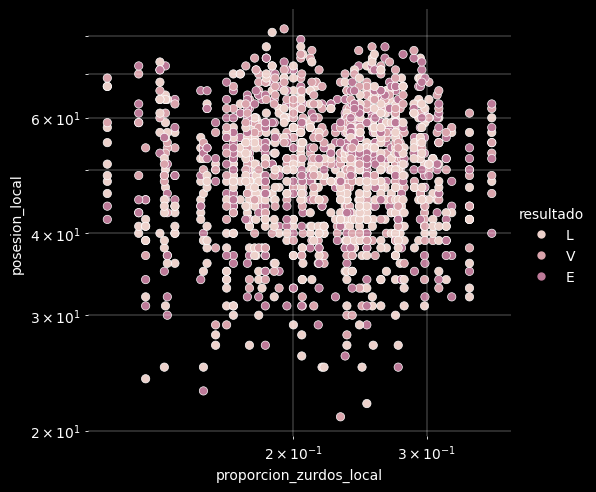

In [18]:
"""
ganalocal=datos[datos['resultado']=='L']
sns.scatterplot(data=ganalocal, x="proporcion_zurdos_local", y='posesion_local')
"""


grafico2 = sns.cubehelix_palette()
g = sns.relplot(
    data=datos,
    x="proporcion_zurdos_local", y="posesion_local",
    hue="resultado",
    palette=grafico2, sizes=(10, 200),
)

g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

plt.show()

### Gráfico 3
### Visualización de outoliers para corroborar la aproximación de los datos entre si, y predecir el bajo desvio de estos en la relación cantidad de faltas y cantidad de tarjetas rojas

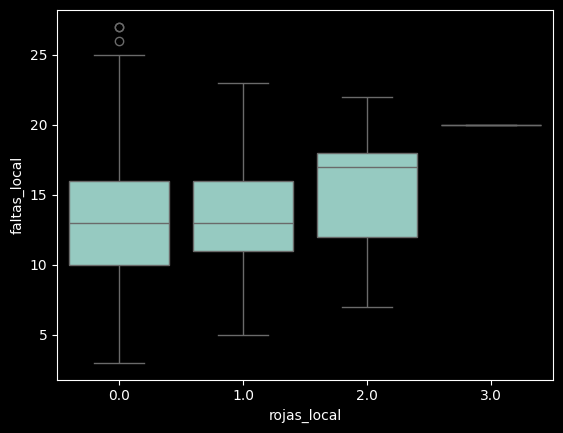

In [19]:
grafico3 = sns.boxplot(datos, x='rojas_local', y='faltas_local') #ni chatgpt sabia como arrglar  el order=[]en el eje x por la cantidad de decimales q tenia
plt.show()

## Visualizaciones para analizar relaciones entre variables candidatas para modelar y verificar hipótesis del proyecto

### Análisis de gráficos de modelo lineal para identificar pendientes distintas a cero

In [20]:
#comenzando a buscar variables importantes para resolver la hipotesis del proyecto
df_local= datos.groupby('resultado').count()['fecha_encuentro']
df_local
print(f'de esta cantidad de partidos :{df_local.sum()} , este fue el  {df_local}')

de esta cantidad de partidos :1512 , este fue el  resultado
E    451
L    657
V    404
Name: fecha_encuentro, dtype: int64


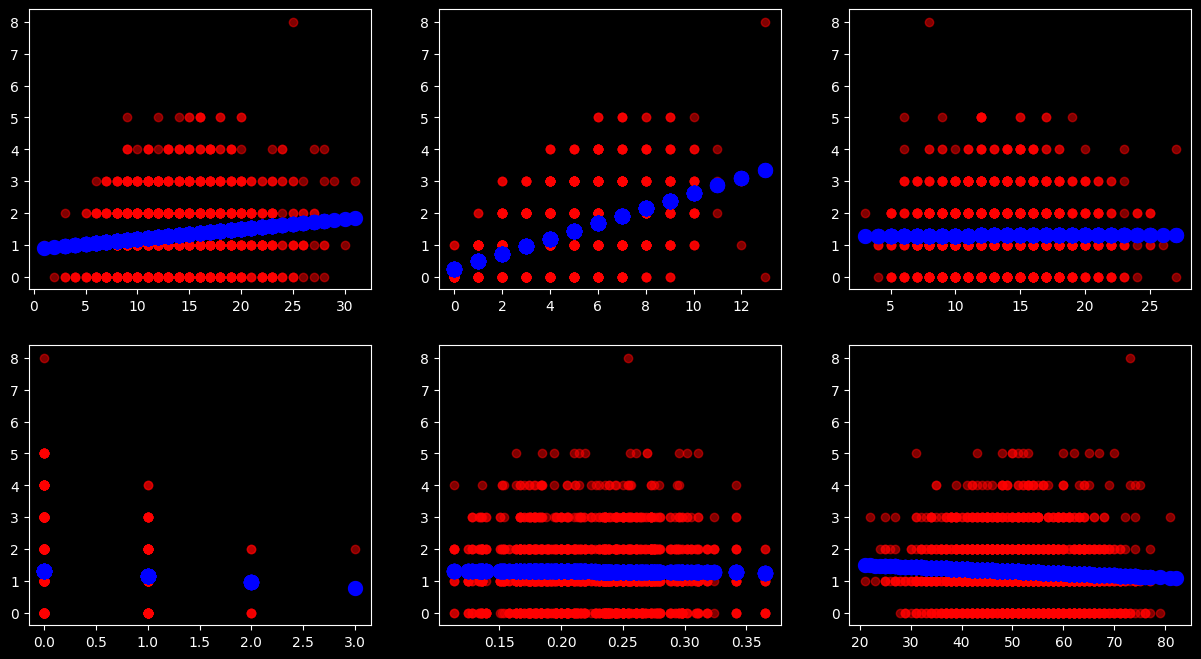

In [21]:
# realizamos la visualizacion para determinar relacion con variable dependiente = 'goles_local'
# con linea de tendencia
fig ,axs =plt.subplots(2,3, figsize=(15,8))

coeficientes = np.polyfit(datos['intentos_local'], datos['goles_local'], 1)
linea_tendencia = np.polyval(coeficientes, datos['intentos_local'])
axs[0,0].scatter(datos['intentos_local'],datos['goles_local'],color='red', alpha=0.5)
axs[0,0].scatter(datos['intentos_local'],linea_tendencia, color='blue', linewidth=5)

coeficientes = np.polyfit(datos['tiros_arco_local'], datos['goles_local'], 1)
linea_tendencia = np.polyval(coeficientes, datos['tiros_arco_local'])
axs[0,1].scatter(datos['tiros_arco_local'],datos['goles_local'],color='red', alpha=0.5)
axs[0,1].scatter(datos['tiros_arco_local'],linea_tendencia, color='blue', linewidth=5)


coeficientes = np.polyfit(datos['faltas_local'], datos['goles_local'], 1)
linea_tendencia = np.polyval(coeficientes, datos['faltas_local'])
axs[0,2].scatter(datos['faltas_local'],datos['goles_local'],color='red', alpha=0.5)
axs[0,2].scatter(datos['faltas_local'],linea_tendencia, color='blue', linewidth=5)



coeficientes = np.polyfit(datos['rojas_local'], datos['goles_local'], 1)
linea_tendencia = np.polyval(coeficientes, datos['rojas_local'])
axs[1,0].scatter(datos['rojas_local'],datos['goles_local'],color='red', alpha=0.5)
axs[1,0].scatter(datos['rojas_local'],linea_tendencia, color='blue', linewidth=5)



coeficientes = np.polyfit(datos['proporcion_zurdos_local'], datos['goles_local'], 1)
linea_tendencia = np.polyval(coeficientes, datos['proporcion_zurdos_local'])
axs[1,1].scatter(datos['proporcion_zurdos_local'],datos['goles_local'],color='red', alpha=0.5)
axs[1,1].scatter(datos['proporcion_zurdos_local'],linea_tendencia, color='blue', linewidth=5)


coeficientes = np.polyfit(datos['posesion_local'], datos['goles_local'], 1)
linea_tendencia = np.polyval(coeficientes, datos['posesion_local'])
axs[1,2].scatter(datos['posesion_local'],datos['goles_local'],color='red', alpha=0.5)
axs[1,2].scatter(datos['posesion_local'],linea_tendencia, color='blue', linewidth=5)

plt.show()


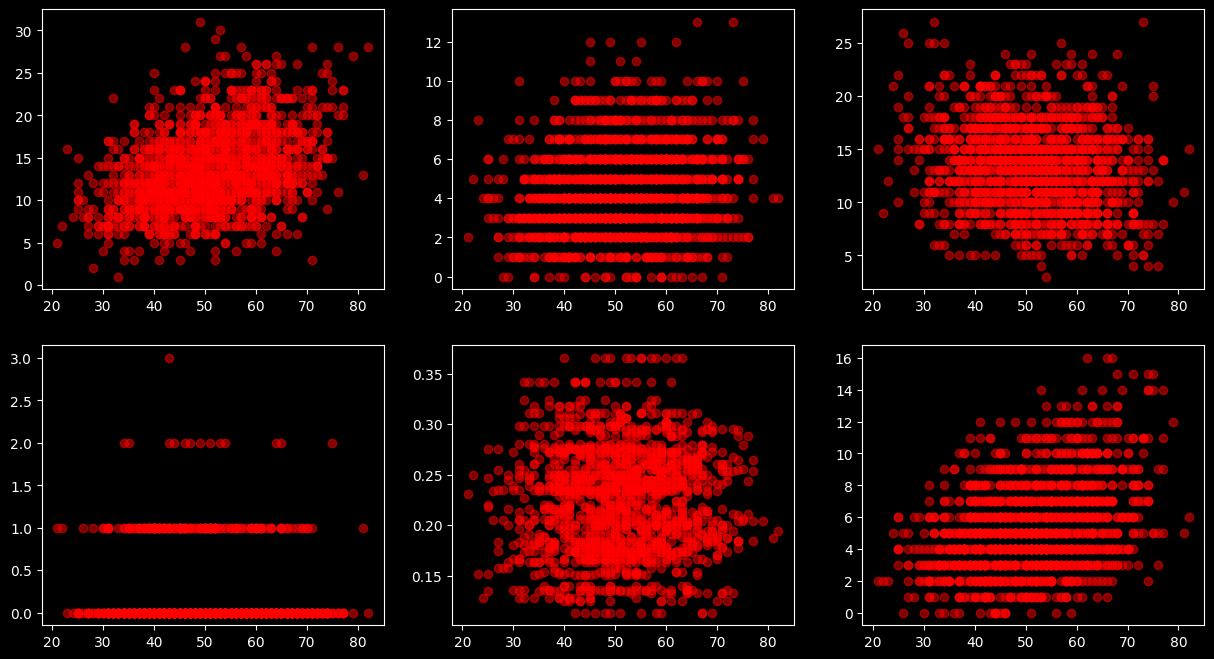

In [22]:
# realizamos la visualizacion para determinar relacion con variable independendiente = 'posesion_local'
#SIN LINEA DE TENDENCIA
fig ,axs =plt.subplots(2,3, figsize=(15,8))


axs[0,0].scatter(datos['posesion_local'],datos['intentos_local'],color='red', alpha=0.5)
axs[0,1].scatter(datos['posesion_local'],datos['tiros_arco_local'],color='red', alpha=0.5)
axs[0,2].scatter(datos['posesion_local'],datos['faltas_local'],color='red', alpha=0.5)
axs[1,0].scatter(datos['posesion_local'],datos['rojas_local'],color='red', alpha=0.5)
axs[1,1].scatter(datos['posesion_local'],datos['proporcion_zurdos_local'],color='red', alpha=0.5)
axs[1,2].scatter(datos['posesion_local'],datos['tiro_esquina_local'],color='red', alpha=0.5)


plt.show()


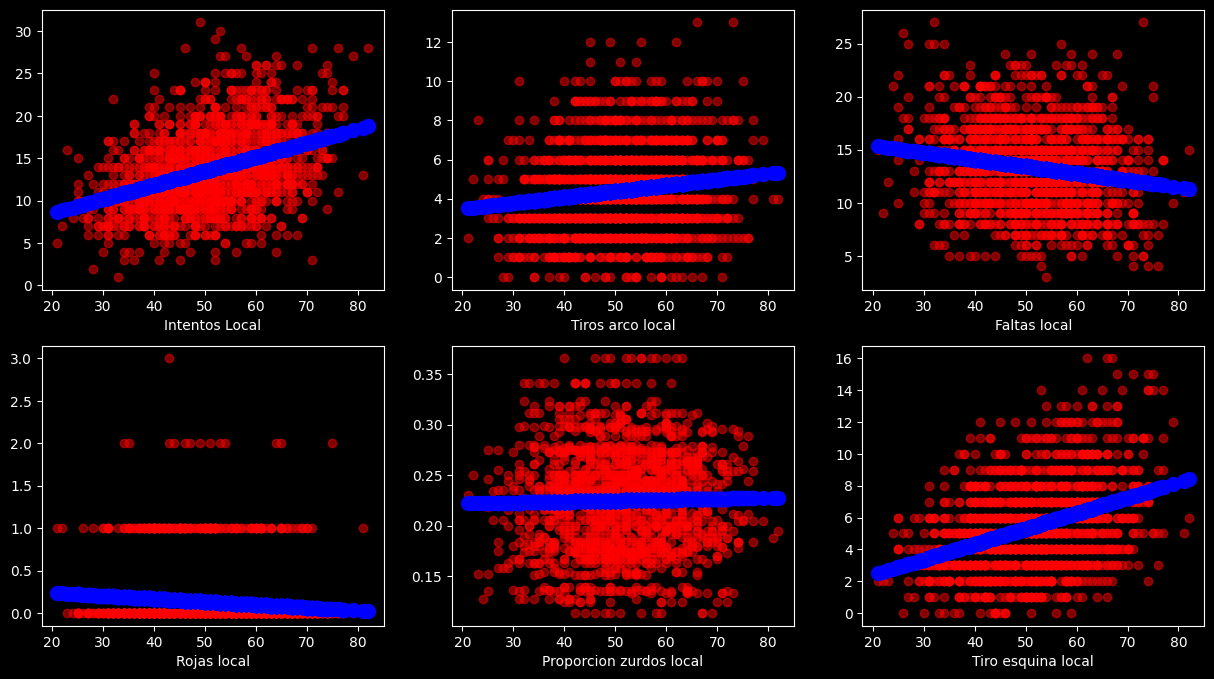

In [23]:
# realizamos la visualizacion para determinar relacion con variable independendiente = 'posesion_local'
#CON LINEA DE TENDENCIA
fig ,axs =plt.subplots(2,3, figsize=(15,8))

coeficientes = np.polyfit(datos['posesion_local'], datos['intentos_local'], 1)
linea_tendencia = np.polyval(coeficientes, datos['posesion_local'])
axs[0,0].scatter(datos['posesion_local'],datos['intentos_local'],color='red', alpha=0.5)
axs[0,0].scatter(datos['posesion_local'],linea_tendencia, color='blue', linewidth=5)
axs[0, 0].set_xlabel('Intentos Local')

coeficientes = np.polyfit(datos['posesion_local'], datos['tiros_arco_local'], 1)
linea_tendencia = np.polyval(coeficientes, datos['posesion_local'])
axs[0,1].scatter(datos['posesion_local'],datos['tiros_arco_local'],color='red', alpha=0.5)
axs[0,1].scatter(datos['posesion_local'],linea_tendencia, color='blue', linewidth=5)
axs[0, 1].set_xlabel('Tiros arco local')

coeficientes = np.polyfit(datos['posesion_local'], datos['faltas_local'], 1)
linea_tendencia = np.polyval(coeficientes, datos['posesion_local'])
axs[0,2].scatter(datos['posesion_local'],datos['faltas_local'],color='red', alpha=0.5)
axs[0,2].scatter(datos['posesion_local'],linea_tendencia, color='blue', linewidth=5)
axs[0, 2].set_xlabel('Faltas local')


coeficientes = np.polyfit(datos['posesion_local'], datos['rojas_local'], 1)
linea_tendencia = np.polyval(coeficientes, datos['posesion_local'])
axs[1,0].scatter(datos['posesion_local'],datos['rojas_local'],color='red', alpha=0.5)
axs[1,0].scatter(datos['posesion_local'],linea_tendencia, color='blue', linewidth=5)
axs[1,0 ].set_xlabel('Rojas local')


coeficientes = np.polyfit(datos['posesion_local'], datos['proporcion_zurdos_local'], 1)
linea_tendencia = np.polyval(coeficientes, datos['posesion_local'])
axs[1,1].scatter(datos['posesion_local'],datos['proporcion_zurdos_local'],color='red', alpha=0.5)
axs[1,1].scatter(datos['posesion_local'],linea_tendencia, color='blue', linewidth=5)
axs[1,1].set_xlabel('Proporcion zurdos local')


coeficientes = np.polyfit(datos['posesion_local'], datos['tiro_esquina_local'], 1)
linea_tendencia = np.polyval(coeficientes, datos['posesion_local'])
axs[1,2].scatter(datos['posesion_local'],datos['tiro_esquina_local'],color='red', alpha=0.5)
axs[1,2].scatter(datos['posesion_local'],linea_tendencia, color='blue', linewidth=5)
axs[1,2].set_xlabel('Tiro esquina local')


plt.show()


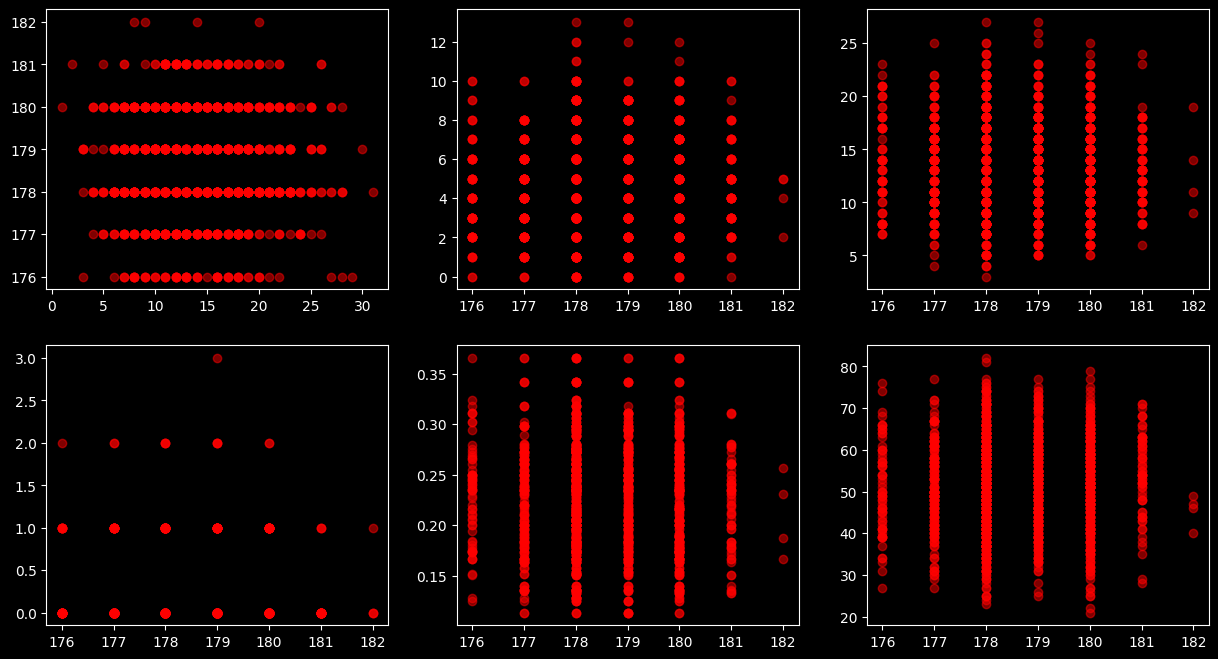

In [24]:
# realizamos la visualizacion para determinar relacion con variable independendiente = 'edad_media_local'
fig ,axs =plt.subplots(2,3, figsize=(15,8))
axs[0,0].scatter(datos['intentos_local'],datos['altura_media_local'],color='red', alpha=0.5)
axs[0,1].scatter(datos['altura_media_local'],datos['tiros_arco_local'],color='red', alpha=0.5)
axs[0,2].scatter(datos['altura_media_local'],datos['faltas_local'],color='red', alpha=0.5)
axs[1,0].scatter(datos['altura_media_local'],datos['rojas_local'],color='red', alpha=0.5)
axs[1,1].scatter(datos['altura_media_local'],datos['proporcion_zurdos_local'],color='red', alpha=0.5)
axs[1,2].scatter(datos['altura_media_local'],datos['posesion_local'],color='red', alpha=0.5)


plt.show()


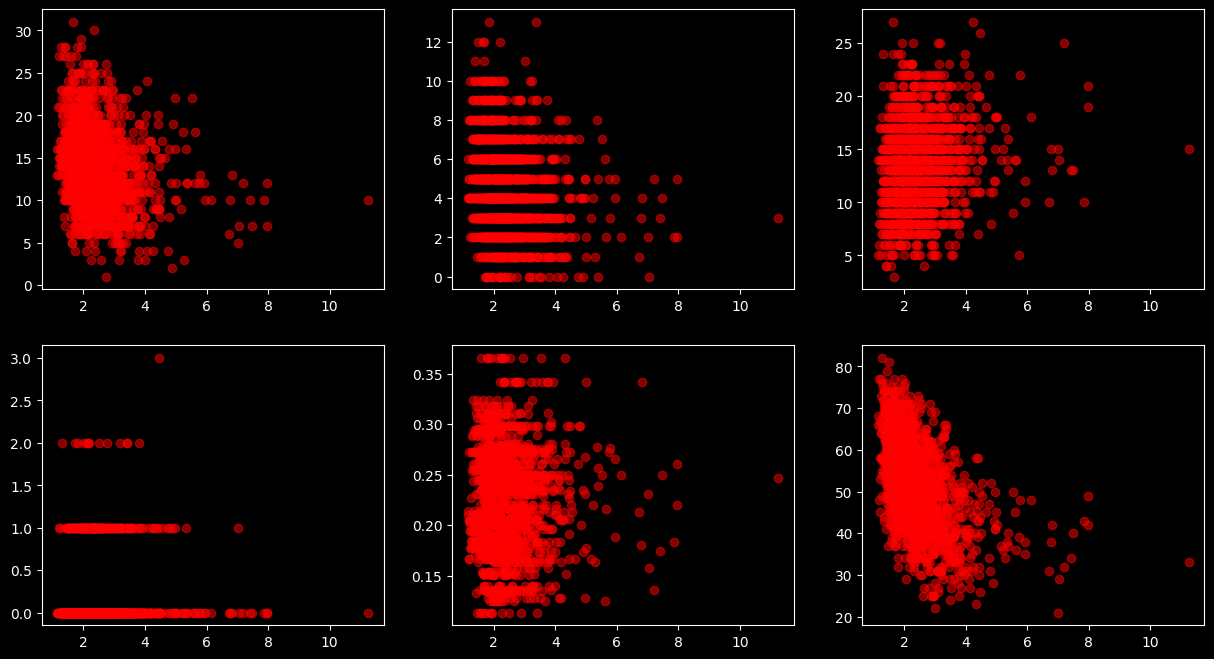

In [25]:
# realizamos la visualizacion para determinar relacion con variable independendiente = 'apuesta_local'
fig ,axs =plt.subplots(2,3, figsize=(15,8))
axs[0,0].scatter(datos['apuesta_local'],datos['intentos_local'],color='red', alpha=0.5)
axs[0,1].scatter(datos['apuesta_local'],datos['tiros_arco_local'],color='red', alpha=0.5)
axs[0,2].scatter(datos['apuesta_local'],datos['faltas_local'],color='red', alpha=0.5)
axs[1,0].scatter(datos['apuesta_local'],datos['rojas_local'],color='red', alpha=0.5)
axs[1,1].scatter(datos['apuesta_local'],datos['proporcion_zurdos_local'],color='red', alpha=0.5)
axs[1,2].scatter(datos['apuesta_local'],datos['posesion_local'],color='red', alpha=0.5)


plt.show()


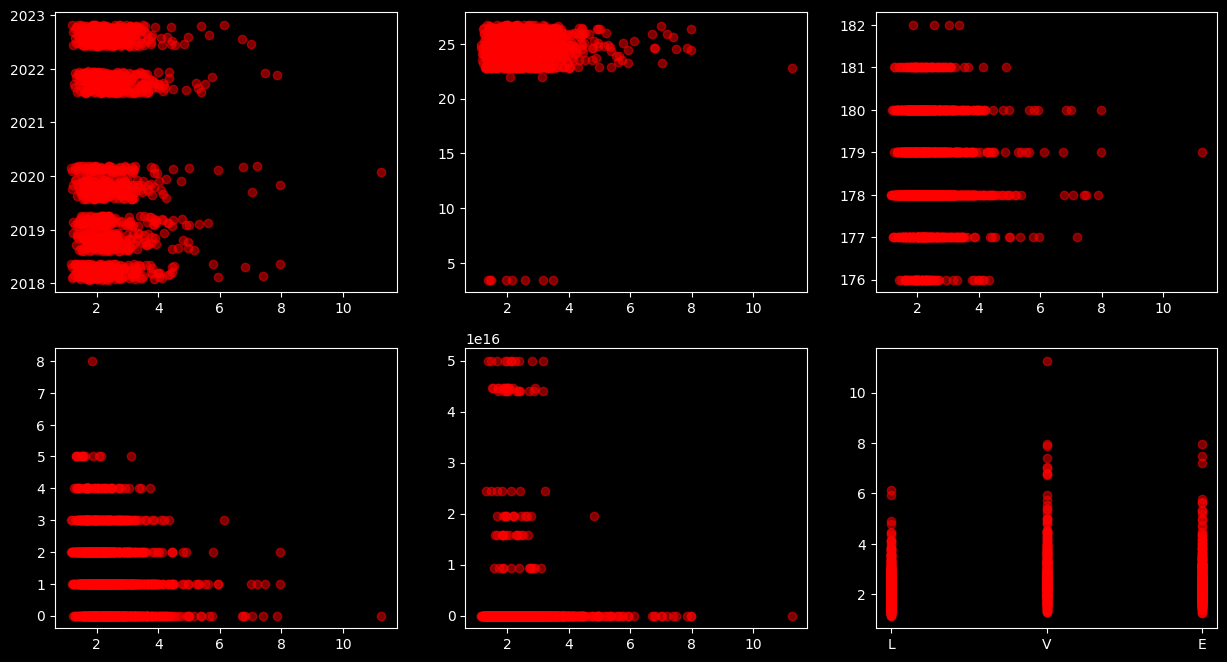

In [26]:
# realizamos la visualizacion para determinar relacion con variable independendiente = 'apuesta_local' con otro grupo de variables dependientes
fig ,axs =plt.subplots(2,3, figsize=(15,8))
axs[0,0].scatter(datos['apuesta_local'],datos['fecha_encuentro'],color='red', alpha=0.5)
axs[0,1].scatter(datos['apuesta_local'],datos['edad_media_local'],color='red', alpha=0.5)
axs[0,2].scatter(datos['apuesta_local'],datos['altura_media_local'],color='red', alpha=0.5)
axs[1,0].scatter(datos['apuesta_local'],datos['goles_local'],color='red', alpha=0.5)
axs[1,1].scatter(datos['apuesta_local'],datos['valor_mercado_local'],color='red', alpha=0.5)
axs[1,2].scatter(datos['resultado'],datos['apuesta_local'],color='red', alpha=0.5)


plt.show()


In [27]:
# chequeamos r2 y otros estadisticos
model1 = 'edad_media_local~altura_media_local'
lm1   = smf.ols(formula = model1, data = datos).fit()
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:       edad_media_local   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.03574
Date:                Wed, 22 May 2024   Prob (F-statistic):              0.850
Time:                        18:27:13   Log-Likelihood:                -3090.5
No. Observations:                1512   AIC:                             6185.
Df Residuals:                    1510   BIC:                             6196.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             23.3230      7

In [28]:
# chequeamos r2 y otros estadisticos con 'tiros_arco_local' vs 'goles_local'
model2 = 'tiros_arco_local~goles_local'
lm1   = smf.ols(formula = model2, data = datos).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:       tiros_arco_local   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     437.6
Date:                Wed, 22 May 2024   Prob (F-statistic):           1.50e-85
Time:                        18:27:13   Log-Likelihood:                -3165.0
No. Observations:                1513   AIC:                             6334.
Df Residuals:                    1511   BIC:                             6345.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.1967      0.077     41.586      

In [29]:
# chequeamos r2 y otros estadisticos con 'tiros_arco_local' vs 'goles_local'+'resultado' y encontre algo potable para desarrollar con un buen r2 para LOCAL
model2 = 'goles_local~tiros_arco_local + resultado'
lm1   = smf.ols(formula = model2, data = datos).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:            goles_local   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     524.4
Date:                Wed, 22 May 2024   Prob (F-statistic):          2.07e-233
Time:                        18:27:13   Log-Likelihood:                -1780.5
No. Observations:                1513   AIC:                             3569.
Df Residuals:                    1509   BIC:                             3590.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2029      0.053  

In [30]:
# chequeamos r2 y otros estadisticos con 'posesion_local' vs 'intentos_local'
model1_Po = 'posesion_local~intentos_local'
lm1   = smf.ols(formula = model1_Po, data = datos).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         posesion_local   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     249.8
Date:                Wed, 22 May 2024   Prob (F-statistic):           3.45e-52
Time:                        18:27:13   Log-Likelihood:                -5623.1
No. Observations:                1513   AIC:                         1.125e+04
Df Residuals:                    1511   BIC:                         1.126e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         39.3922      0.785     50.

In [31]:
# chequeamos r2 y otros estadisticos con 'posesion_local' vs 'tiros_arco_local'
model2_Po = 'posesion_local~tiros_arco_local'
lm1   = smf.ols(formula = model2_Po, data = datos).fit()
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:         posesion_local   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     32.28
Date:                Wed, 22 May 2024   Prob (F-statistic):           1.60e-08
Time:                        18:27:13   Log-Likelihood:                -5722.8
No. Observations:                1513   AIC:                         1.145e+04
Df Residuals:                    1511   BIC:                         1.146e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           48.0445      0.607  

In [32]:
# chequeamos r2 y otros estadisticos con 'posesion_local' vs 'tiro_esquina_local'
model3_Po = 'posesion_local~tiro_esquina_local'
lm1   = smf.ols(formula = model3_Po, data = datos).fit()
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:         posesion_local   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     238.7
Date:                Wed, 22 May 2024   Prob (F-statistic):           4.20e-50
Time:                        18:27:13   Log-Likelihood:                -5627.9
No. Observations:                1513   AIC:                         1.126e+04
Df Residuals:                    1511   BIC:                         1.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             43.5266      0

In [33]:
# con variable 'posesion_local' pero pensando en cluster con 'faltas_local'
model_cluster_Po1 = 'posesion_local~faltas_local'
lm1   = smf.ols(formula = model_cluster_Po1, data = datos).fit()
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:         posesion_local   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     47.94
Date:                Wed, 22 May 2024   Prob (F-statistic):           6.47e-12
Time:                        18:27:13   Log-Likelihood:                -5715.2
No. Observations:                1513   AIC:                         1.143e+04
Df Residuals:                    1511   BIC:                         1.144e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       57.4130      0.948     60.538   

In [34]:
# con variable 'posesion_local' pero pensando en cluster con 'proporcion_zurdos_local'
model_cluster_Po2 = 'posesion_local~proporcion_zurdos_local'
lm1   = smf.ols(formula = model_cluster_Po2, data = datos).fit()
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:         posesion_local   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6005
Date:                Wed, 22 May 2024   Prob (F-statistic):              0.439
Time:                        18:27:13   Log-Likelihood:                -5738.5
No. Observations:                1513   AIC:                         1.148e+04
Df Residuals:                    1511   BIC:                         1.149e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [35]:
# con variable 'apuesta_local' relacion con 'posesion_local'
model1_ap = 'apuesta_local~posesion_local'
lm1   = smf.ols(formula = model1_ap, data = datos).fit()
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:          apuesta_local   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     423.9
Date:                Wed, 22 May 2024   Prob (F-statistic):           3.21e-83
Time:                        18:27:13   Log-Likelihood:                -1808.9
No. Observations:                1512   AIC:                             3622.
Df Residuals:                    1510   BIC:                             3632.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.4865      0.100     44.

In [36]:
# con variable 'apuesta_local' pero chequeando cluster  'intentos_local'
model1_clus_ap = 'apuesta_local~intentos_local'
lm1   = smf.ols(formula = model1_clus_ap, data = datos).fit()
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:          apuesta_local   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     98.32
Date:                Wed, 22 May 2024   Prob (F-statistic):           1.70e-22
Time:                        18:27:13   Log-Likelihood:                -1948.3
No. Observations:                1512   AIC:                             3901.
Df Residuals:                    1510   BIC:                             3911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.1164      0.069     44.

In [37]:
# con variable 'apuesta_local' pero chequeando cluster  'faltas_local'
model2_clus_ap = 'apuesta_local~faltas_local'
lm1   = smf.ols(formula = model2_clus_ap, data = datos).fit()
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:          apuesta_local   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     41.15
Date:                Wed, 22 May 2024   Prob (F-statistic):           1.89e-10
Time:                        18:27:13   Log-Likelihood:                -1975.6
No. Observations:                1512   AIC:                             3955.
Df Residuals:                    1510   BIC:                             3966.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.9735      0.080     24.616   

In [38]:
# con variable 'apuesta_local' pero chequeando cluster  'proporcion_zurdos_local'
model3_clus_ap = 'apuesta_local~proporcion_zurdos_local'
lm1   = smf.ols(formula = model3_clus_ap, data = datos).fit() #incrementar lm segun cantida de modelos de variables totales
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:          apuesta_local   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.03093
Date:                Wed, 22 May 2024   Prob (F-statistic):              0.860
Time:                        18:27:13   Log-Likelihood:                -1995.9
No. Observations:                1512   AIC:                             3996.
Df Residuals:                    1510   BIC:                             4007.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [39]:
#integracion de variables que se cree inciden en 'resultado' = L (gana local)
model_int= 'apuesta_local~posesion_local + tiro_esquina_local +intentos_local + tiros_arco_local'
lmi   = smf.ols(formula = model_int, data = datos).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:          apuesta_local   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.03093
Date:                Wed, 22 May 2024   Prob (F-statistic):              0.860
Time:                        18:27:13   Log-Likelihood:                -1995.9
No. Observations:                1512   AIC:                             3996.
Df Residuals:                    1510   BIC:                             4007.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

#3- Análisis Exploratorio de Datos

## Algunos conceptos derivados de los análisis anteriores

Con la visualización a través de los gráficos se logró una primera aproximación para ver que variables tienen comportamientos positivos o negativos entre si, lo que establecería pendientes distintas de cero que las posicionarían como variables listas para realizarle el test de r2.
Luego, con la ayuda de la libreria *statsmodels*  se construyó un algoritmo para obtener una serie de indicadores que muestran resultados de la regresión.
Como regla básica se espera que en el contexto de regresión, el coeficiente de determinación (R2) es una métrica comúnmente utilizada para evaluar el rendimiento del modelo.El  valor entre 0 y 1 que brinda información sobre la variabilidad en la variable dependiente. Lo cual ayuda en este caso a observar de que manera el modelo propuesto, en este caso por ahora estamos analizando el ajuste de la relación entre variables candidatas a formar parte del modelo final, y aproximarse a la realidad para obtener el estadístico buscado en este proyecto, el cual necesita nutrirse de variables o coeficientes determinantes y eficientes.
Por otra parte, al realizarse una interesante cantidad de gráficos bivariados para obtener su correlación, en varios se detectó fácilmente que las tendencias eran desechables, pero por su distribución y agrupamiento podrían brindar información mediante indicando cluster de las mismas. Igualmente se demostró, con los resultados de la regresión, que dichas variables eran desechables para explicar la variabilidad de los datos.

### Qué se obtuvo hasta esta etapa

### Insights

 Las variables candidatas a esta altura del proyecto han pasado el filtro técnico para ser determinantes y concluyentes en el ajuste del modelo deseado. Primero descartamos pendientes cero o negativas mediante los gráficos correspondientes y luego aplicando un algoritmo de regresión lineal (en algunos casos probando con multivariables) se puede  afirmar que se investiga en una buena rama de trabajo para crear el modelo predictivo que buscará el algoritmo que verifique o aproxime la hipótesis de este trabajo. Esto no rechaza la idea de que se construya otra rama ya que en los datos tenemos el atributo 'apuesta_local' el cual puede ayudar a tener un aceptable entrenamiento del modelo, aunque los datos con los que contamos no sean abundantes.
 Por el momento con un de R-squared: 0.510 , las variables correlacionadas "goles_local", "tiros_arco_local" y "resultado" son las aspirantes más firmes a incluir en el algoritmo.

### Detección de problemas presentes que ¿podrían perjudicar nuestro siguiente estapa del proyecto?

En principio, con el data frame normalizado y con las variables candidatas asumidas como potencialmente útiles, estaríamos logrando transitar una primera etapa de la estructura del proyecto con sólidos argumentos para :

1) Responder de manera favorable la hipótesis y lograr mediante ML un algoritmo eficiente para verificar la probabilidad requeridad dentro del intervalo de confianza asumido o,
2)No alcanzar la probabilidad requerida en ese intervalo de confianza.

Pero cuando se ajusta el análisis y se eleva la exigencia respecto a cantidad y calidad de los datos, se podría considerar que  los datos representan una muestra acorde a los principales teoremas estadísticos actuales, pero se necesitaría aplicar un modelo de árbol de decisión con variables numéricas para clasificar el mejor recorrido de la o las variables elegidas mediante el chequeo de condición y el análisis posterior de la asignación final, como método de aprendisaje supervizado que genere cierto grado de nueva validez al modelo.

Como segundo algoritmo para entrenar al modelo y intentar resolver por la positiva la hipótesis de este proyecto, se probaría con regresión logistica  basandose en los siguientes argumentos ex-ante:

1) El atributo a considerar como salida del análisis predictivo del modelo (que sería producido por el algoritmo de ML)  es **"L"**, un dato cualitativo que significa que el partido de fútbol lo ganó el equipo local. Por lo que las variables que incidan de una manera estadísticamente solida en este atributo, serán las que tendremos que de manera obligatoria introducir en el entrenamiento y, si es viable, en el algoritmo final para predicir con la probabilidad que se busca.

2) La regresión logística, en principio, sería clave al trabajar para K=3 clases (L= gana el local, V=gana el visitante y E= empate) que en este caso seria multinomial y a priori contundente para este desarrollar el modelo.

### ¿Por qué es importante este análisis?

Desde el punto de vista de la sociedad en su conjunto, el juego compulsivo es perjudical para la salud del jugador y también para las personas del círculo íntimo. Sin entrar en mayor detalles porque no es el motivo de este análisis,  
se estaría brindando una información  estadística de sustancial importancia para establecer las verdaderas posibilidades de generar ingresos recurrentes por parte del jugador, en cierto modo alertando de su variabilidad y riesgo.
También en este sentido, las personas que quisieran iniciarse en las apuestas digitales estarían en condiciones de aceptar el riesgo implicito que asumen al exponer su capital. Como una rama de este proyecto, se propondiria, con cierto grado de certidumbre, el porcentaje promedio de acierto en la apuesta digital de partidos de fútbol argentino.
Desde el punto de vista de la ciencia estadística y de la propensión de los economistas, matemáticos y profesionales de estas áreas, en la cual se incluye el autor de este trabajo, es de larga data y constante la búsqueda del método efectivo para ganar dinero en un juego de azar, encontrando el vector que pueda identificar patrones para acertar la mayor cantidad de veces, en el menor número de intentos.

## Data Wrangling

En este apartado vamos a examinar los datos para identificar cualquier información faltante, nula, duplicada (si corresponde) y valores atípicos, antes de avanzar y poder acondicionar los valores.

In [40]:
#exploramos los datos para buscar nulos
datos_nulos=datos.isnull().sum()

print (f' Total de datos nulos {datos_nulos.sum()}')
datos_nulos

 Total de datos nulos 11


torneo                         0
fecha                          0
partido                        0
equipo_local                   0
equipo_visitante               0
goles_local                    0
goles_visitante                0
posesion_local                 0
tiros_arco_local               0
intentos_local                 0
faltas_local                   0
tiro_esquina_local             0
posesion_visitante             0
tiros_arco_visitante           0
intentos_visitante             0
faltas_visitante               0
tiro_esquina_visitante         0
amarillas_local                0
amarillas_visitante            1
rojas_local                    0
rojas_visitante                0
valor_mercado_local            0
altura_media_local             0
edad_media_local               1
proporcion_zurdos_local        0
valor_mercado_visitante        0
altura_media_visitante         0
edad_media_visitante           3
proporcion_zurdos_visitante    0
resultado                      0
fecha_encu

<Axes: >

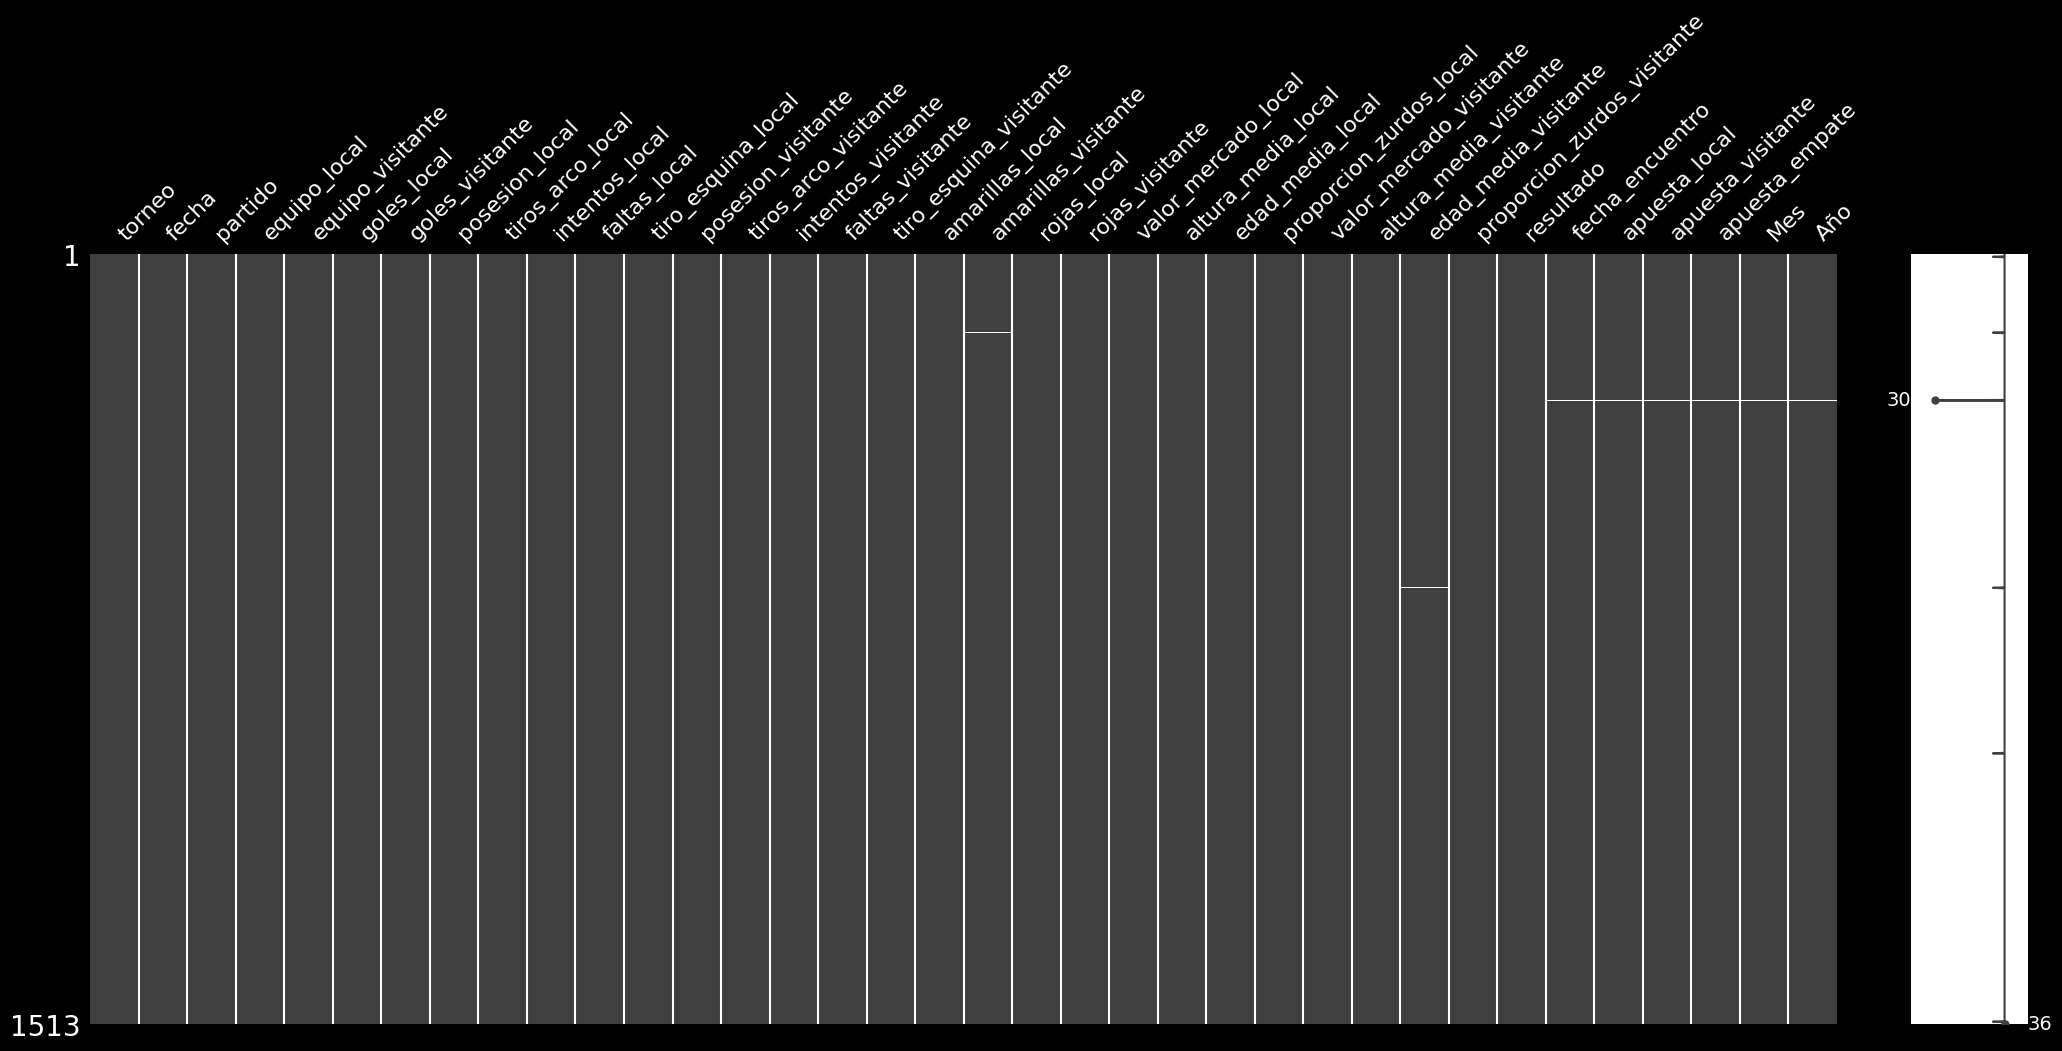

In [41]:
#Se encontraron nulos, vamos a visualizarlo
import missingno as msno
msno.matrix(datos)

In [42]:
#reemplazo nulos por mediana
#creo variable conteniendo las columanas con nulos
col_nul=['amarillas_visitante','edad_media_local','edad_media_visitante','fecha_encuentro','apuesta_local','apuesta_visitante','apuesta_empate','Mes','Año']

for i in col_nul: # reemplazar por la mediana en las columnas numericas en col_inter
  datos[i] = datos[i].fillna(datos[i].median())

In [43]:
datos.apuesta_visitante.isnull().sum() # Verificar que funciono

0

<Axes: >

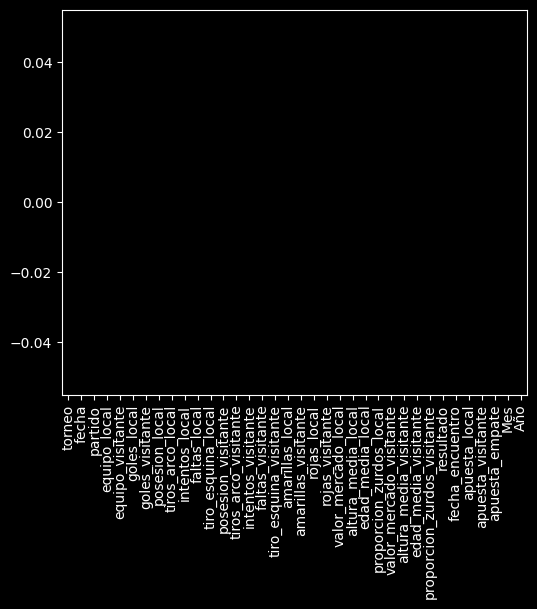

In [44]:
# Graficamente comprobamos si modificamos los nulos
plt.figure(figsize=(6,5))
datos.isnull().sum().plot(kind='bar')

In [45]:
#con missigno pude saber donde estan ubicados los nulos, entonces seran esas columnas las q reemplace por
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   torneo                       1513 non-null   object        
 1   fecha                        1513 non-null   int64         
 2   partido                      1513 non-null   int64         
 3   equipo_local                 1513 non-null   object        
 4   equipo_visitante             1513 non-null   object        
 5   goles_local                  1513 non-null   int64         
 6   goles_visitante              1513 non-null   int64         
 7   posesion_local               1513 non-null   float64       
 8   tiros_arco_local             1513 non-null   float64       
 9   intentos_local               1513 non-null   float64       
 10  faltas_local                 1513 non-null   float64       
 11  tiro_esquina_local           1513 non-null 

In [46]:
#controlamos si existen datos duplicados
datos.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1508    False
1509    False
1510    False
1511    False
1512    False
Length: 1513, dtype: bool

In [47]:
print(datos.shape)
datos1= datos.drop_duplicates()
print(datos1.shape)
print(f'Los valores duplicado fueron {datos1.shape[0] - datos.shape[0]}')

(1513, 36)
(1513, 36)
Los valores duplicado fueron 0


#4- Primera aproximación de las variables para elegir los datos de entrenamientos




### Feature Selection: PCA (Principal Component Analysis)

In [48]:
print(datos.columns)

columnas = ['tiros_arco_local','posesion_local','goles_local','intentos_local']
df_pca = datos[columnas]

scaler = StandardScaler()
df_scaler = scaler.fit_transform(df_pca)

pca = PCA(n_components=1)
df_reduced = pca.fit_transform(df_scaler)

df_pca = pd.DataFrame(data=df_reduced, columns=['Componente 1'])

df_pca['resultado'] = datos['resultado']

print(df_pca.head())

Index(['torneo', 'fecha', 'partido', 'equipo_local', 'equipo_visitante',
       'goles_local', 'goles_visitante', 'posesion_local', 'tiros_arco_local',
       'intentos_local', 'faltas_local', 'tiro_esquina_local',
       'posesion_visitante', 'tiros_arco_visitante', 'intentos_visitante',
       'faltas_visitante', 'tiro_esquina_visitante', 'amarillas_local',
       'amarillas_visitante', 'rojas_local', 'rojas_visitante',
       'valor_mercado_local', 'altura_media_local', 'edad_media_local',
       'proporcion_zurdos_local', 'valor_mercado_visitante',
       'altura_media_visitante', 'edad_media_visitante',
       'proporcion_zurdos_visitante', 'resultado', 'fecha_encuentro',
       'apuesta_local', 'apuesta_visitante', 'apuesta_empate', 'Mes', 'Año'],
      dtype='object')
   Componente 1 resultado
0     -1.522312         L
1      0.071706         V
2      0.160911         L
3     -1.339543         E
4      1.695965         L


Componente 1: Después de aplicar PCA, obtuve una nueva forma de representar los datos. En este caso, "Componente 1" es una combinación de las características originales que captura la mayor parte de la variación en los datos.
Resultado del Partido: Esta columna indica si el equipo local ganó ("L"), el equipo visitante ganó ("V") o si el partido terminó en empate ("E").
"Componente 1" en relación con el resultado del partido:
Si un valor en "Componente 1" es negativo, indica que ese partido tiende a favorecer al equipo local.
Si es positivo, indica que ese partido tiende a favorecer al equipo visitante.
La magnitud del valor indica qué tan fuertemente se inclina hacia un equipo u otro.
Este método explica si hay alguna relación entre cómo se distribuyen los partidos a lo largo de este "Componente 1" y quién termina ganando el partido.  La mayoría de los partidos con valores grandes absolutos en "Componente 1" terminan con victoria del equipo local, lo cual podría sugerir que ciertos patrones en los datos están relacionados con quién gana el partido.


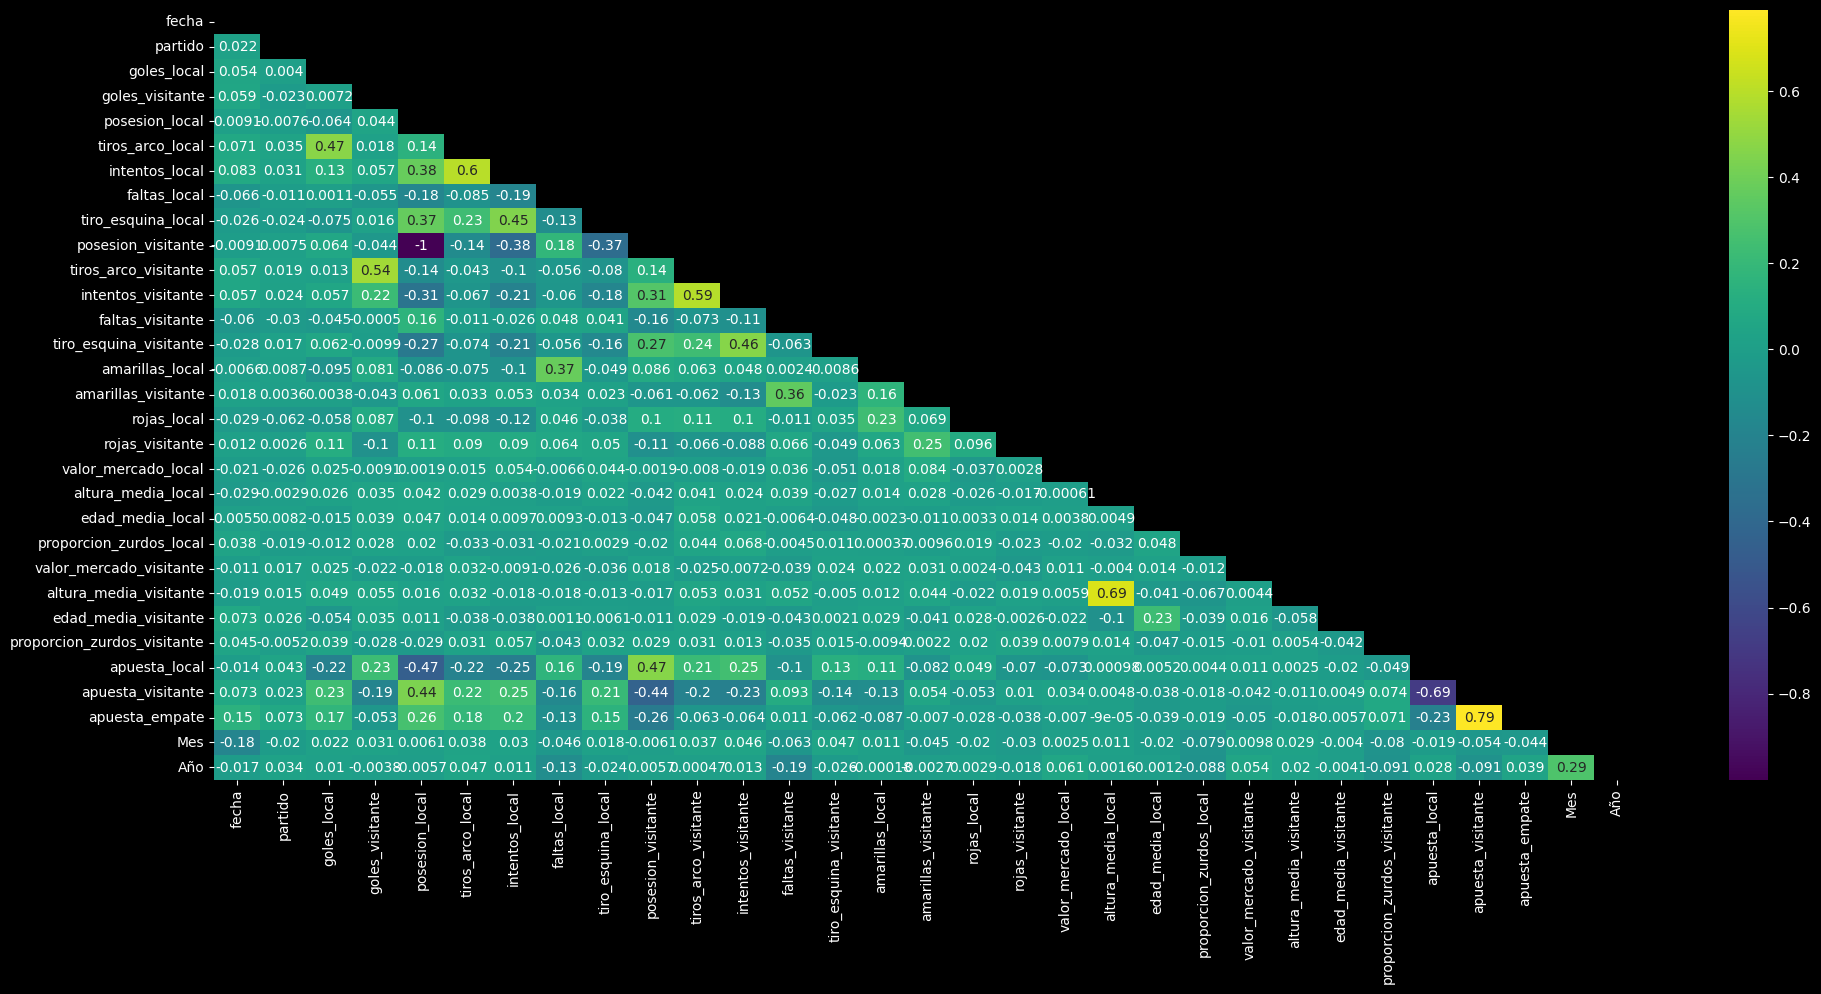

In [49]:
interaccion = datos.corr(numeric_only=True)

ax = plt.subplots(figsize=(23,10))

mask = np.zeros_like(interaccion)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(interaccion,annot=True,cmap='viridis',mask = mask)

Calculando la matriz de correlación del dataframe, solo variables tipo enteros, se crea una figura junto con un mapa de calor para establecer los índices de las relaciones entre los atributos. Así la elección de las variables para aplicar en el algoritmo de ML tendrá mayores argumentos cuantitativos.
A modo de aproximación se comenzó analizando los índices mayores a 0.36, ya que intuitivamente lo que este por debajo de ese coeficiente no alcanzaría a los estándares mínimos que se imponen en este trabajo. Es arbitrario, pero sirve como límite inferior para reforzar el argumento principal que es establecer ajustes correctos del modelo.


Después de analizar los índices que obtuvimos de la matriz anterior podemos descartar los menores a 0,5 y asegurar que las variables con correlaciones positivas más significativas hasta el momento son : 'tiros_arco_local', 'posesion_local', 'goles_local', 'intentos_local. A estas se le agrega la variable 'resultado' que es la que se quiere ponderar para verificar la relacioens entre las anteriores y uno de los estados de esta última. Como se aprecia no se incluyen atributos referenciados al 'visitante' porque aunque tuvieron índices interesantes, en este caso no son de importancia para el objeto de estudio como si lo es la referencia al equipo 'local.
Un apartado para las correlaciones negativas que no se utilizarán en un principio, aunque no se descartan definitivamente, el ejemplo sobresaliente es la variable 'Posesión' tanto en sus versiones 'local' y 'visitante', cuando se las enfrenta contra algunas de las variables elegidas anteriormente muestran índices de entre -0.27 y -0.57 lo cual genera información complementaria para su posterior utilización. Y al correlacionar 'Posesión visitante' con 'Posesión local' se observa que es la unica correlación negativa perfecta, lo cual por la naturaleza en donde cohabitan estas variables claramente es real. Cuanto más posesión de pelota tiene un equipo, es inversamente proporcional la posesión de pelota del equipo contrario, brindando al modelo cierta confiabilidad de los datos con los cuales se cuenta.

Con respecto a la información que brindan los coeficientes de correlación de las apuestas entre ellas y contra las variables elegidas, existen posibilidades concretas para que ayuden a probar el modelo, luego de entrenar el algoritmo,porque de esta manera profundizaran el ajuste para que las predicciones sean precisas.

### Aplicando regresion


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8679867986798679
Confusion Matrix:
[[91  0  0  0  0  0]
 [ 0 96  1  0  0  0]
 [ 0  7 61  4  5  0]
 [ 0  0 11 15  4  0]
 [ 0  0  0  7  0  0]
 [ 0  0  0  1  0  0]]


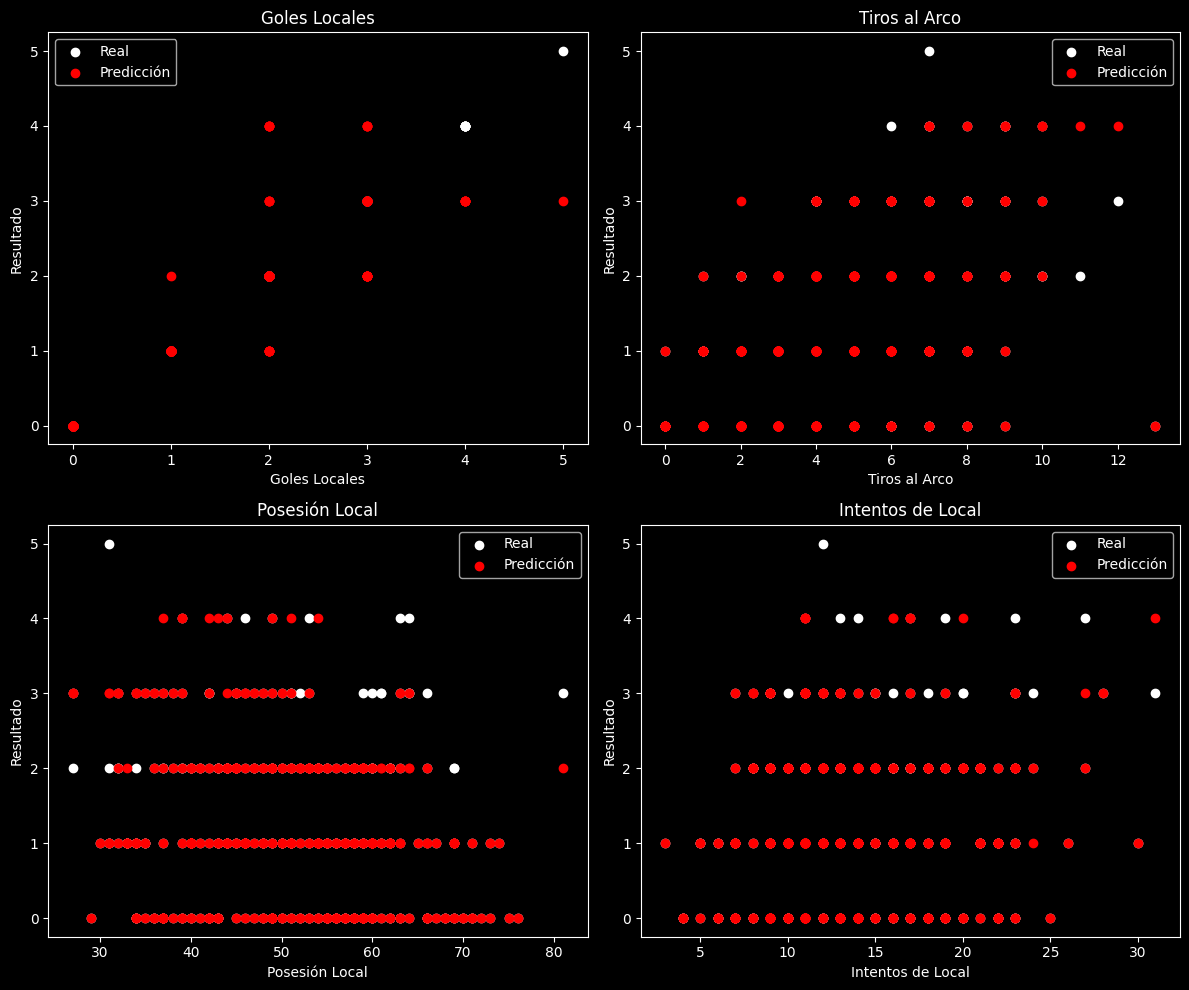

In [50]:
# Dividir el conjunto de datos en variables independientes (X) y dependientes (y)
X = datos[['goles_local', 'tiros_arco_local', 'posesion_local', 'intentos_local']]
y = datos['goles_local']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Visualizar los resultados
# Crear subgráficos para cada variable independiente
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Graficar para 'goles_local'
axs[0, 0].scatter(X_test['goles_local'], y_test, color='white', label='Real')
axs[0, 0].scatter(X_test['goles_local'], y_pred, color='red', label='Predicción')
axs[0, 0].set_title('Goles Locales')
axs[0, 0].set_xlabel('Goles Locales')
axs[0, 0].set_ylabel('Resultado')
axs[0, 0].legend()

# Graficar para 'tirosalarco'
axs[0, 1].scatter(X_test['tiros_arco_local'], y_test, color='white', label='Real')
axs[0, 1].scatter(X_test['tiros_arco_local'], y_pred, color='red', label='Predicción')
axs[0, 1].set_title('Tiros al Arco')
axs[0, 1].set_xlabel('Tiros al Arco')
axs[0, 1].set_ylabel('Resultado')
axs[0, 1].legend()

# Graficar para 'posesionlocal'
axs[1, 0].scatter(X_test['posesion_local'], y_test, color='white', label='Real')
axs[1, 0].scatter(X_test['posesion_local'], y_pred, color='red', label='Predicción')
axs[1, 0].set_title('Posesión Local')
axs[1, 0].set_xlabel('Posesión Local')
axs[1, 0].set_ylabel('Resultado')
axs[1, 0].legend()

# Graficar para 'intentos de local'
axs[1, 1].scatter(X_test['intentos_local'], y_test, color='white', label='Real')
axs[1, 1].scatter(X_test['intentos_local'], y_pred, color='red', label='Predicción')
axs[1, 1].set_title('Intentos de Local')
axs[1, 1].set_xlabel('Intentos de Local')
axs[1, 1].set_ylabel('Resultado')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

**En un primer análisis no funciono como se pretendia la regresion multivariada, quedaria descartada como método de ML para entrenar el modelo.**


## KNN

In [51]:
#Normalizar y elegir variables de estudio con nuevo dataframe
datos_nor = datos[['goles_local', 'posesion_local', 'tiros_arco_local', 'intentos_local']]
datos_nor

,goles_local,posesion_local,tiros_arco_local,intentos_local
0,1,46.0,2.0,9.0
1,1,65.0,3.0,15.0
2,2,54.0,5.0,11.0
3,1,64.0,3.0,4.0
4,2,57.0,7.0,18.0
...,...,...,...,...
1508,3,48.0,2.0,10.0
1509,1,55.0,4.0,10.0
1510,1,62.0,4.0,15.0
1511,1,62.0,12.0,18.0


Consecuentemente se intentará con un modelo de clasificación, realizando tareas de preprocesamiento de datos : primero normalizando las datos de las variables elegidas, y luego mediante data discretization utilizando la técnica de LabelEncoder, es decir a la variable 'resultado' que es cualitativa, se le asigna un número entero para su eficiente uso en la sentencia de código.

In [52]:
def normalizar(datos_nor):
    result = datos_nor.copy()

    for feature_name in datos_nor:
        max_val = datos_nor[feature_name].max()
        min_val = datos_nor[feature_name].min()
        result[feature_name] = (datos_nor[feature_name] - min_val) / (max_val - min_val)

    return result

normalizar(datos_nor)

,goles_local,posesion_local,tiros_arco_local,intentos_local
0,0.125,0.409836,0.153846,0.266667
1,0.125,0.721311,0.230769,0.466667
2,0.250,0.540984,0.384615,0.333333
3,0.125,0.704918,0.230769,0.100000
4,0.250,0.590164,0.538462,0.566667
...,...,...,...,...
1508,0.375,0.442623,0.153846,0.300000
1509,0.125,0.557377,0.307692,0.300000
1510,0.125,0.672131,0.307692,0.466667
1511,0.125,0.672131,0.923077,0.566667


### Variables utilizadas 'tiros_arco_local','intentos_local', 'resultado'

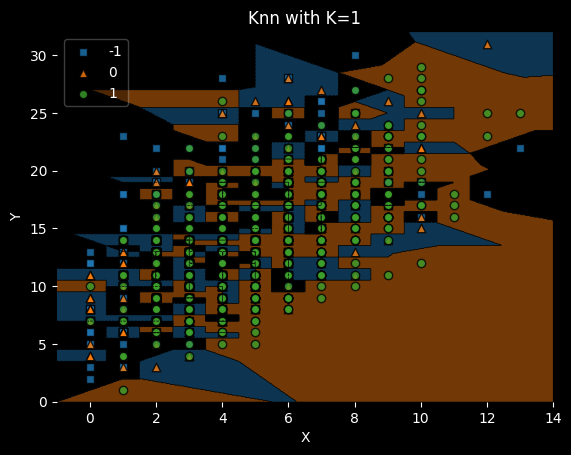

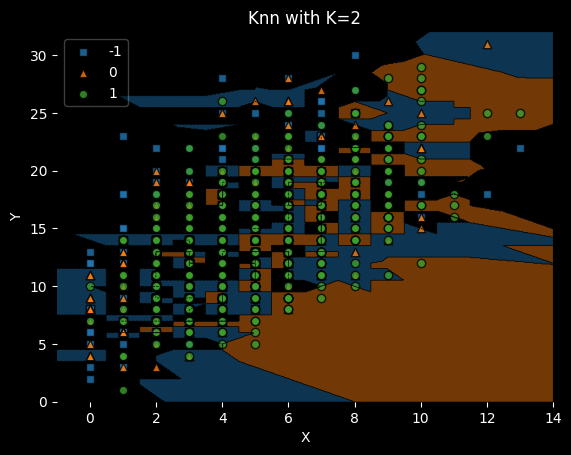

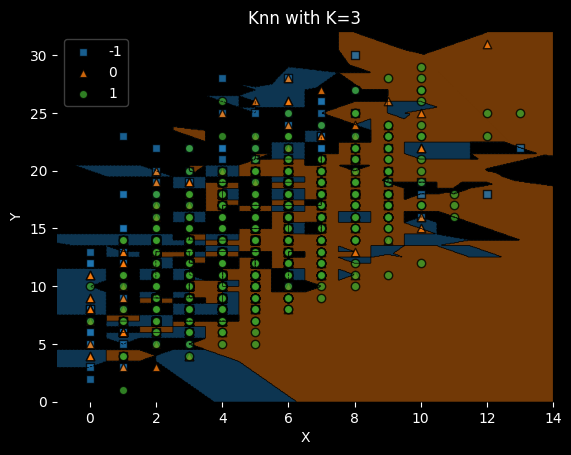

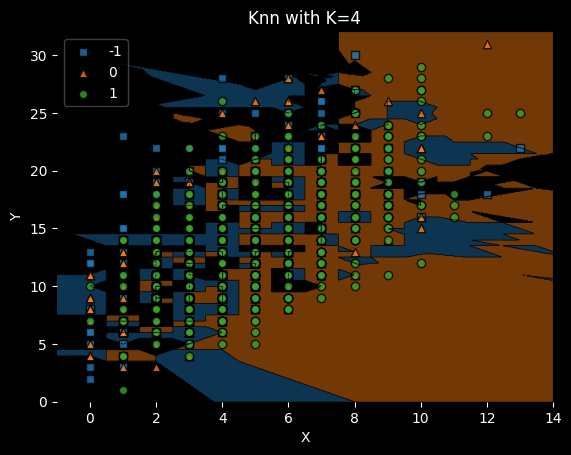

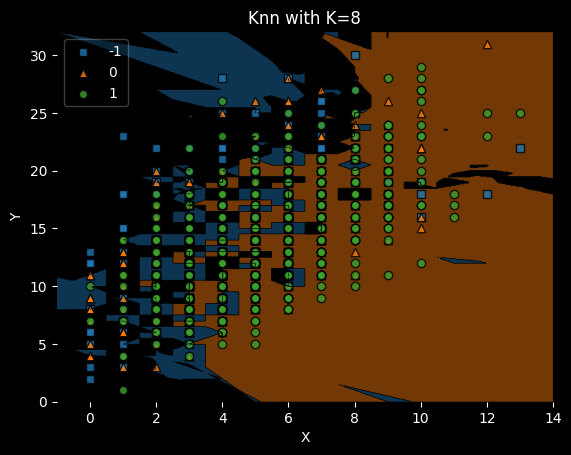

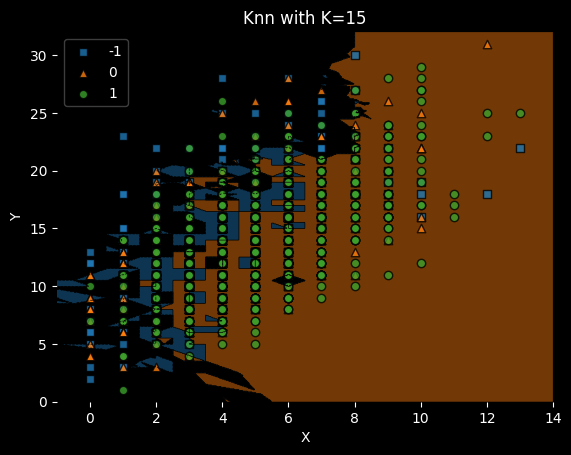

In [53]:
# aca estamos con una correlacion de 0.6
# estuve obligado a labelencoder
datos['resultado'] = datos['resultado'].replace({'L': 1, 'E': 0, 'V': -1})

def knn_comparison(datos, k): # funcion de comparacion
 x = datos[['tiros_arco_local','intentos_local']].values
 y = datos[['resultado']].values.astype(int) # Clase y como int
 y = y.ravel() #aplanar resultados
 clf = neighbors.KNeighborsClassifier(n_neighbors=k) #algoritmo
 clf.fit(x, y)# Graficar la region de decision
 plot_decision_regions(x, y, clf=clf, legend=2)# Añadir anotaciones
 plt.xlabel('X')
 plt.ylabel('Y')
 plt.title('Knn with K='+ str(k))
 plt.show()
# Cargar y aplicar funcion

for i in  [1,2,3,4,8,15] :
    knn_comparison(datos, i)

### Variables utilizadas 'tiros_arco_local','goles_local', 'resultado'

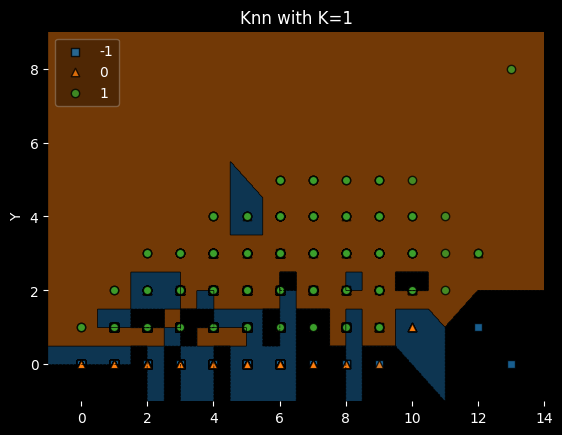

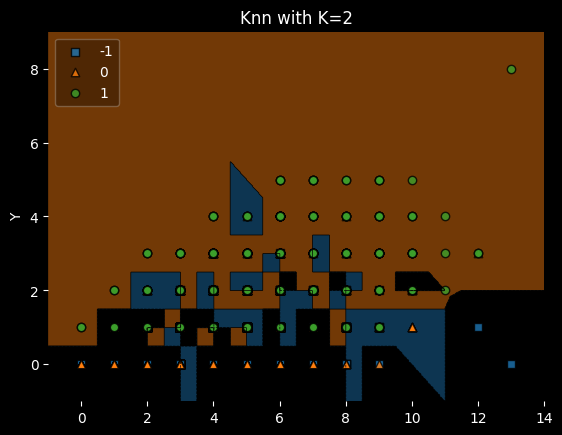

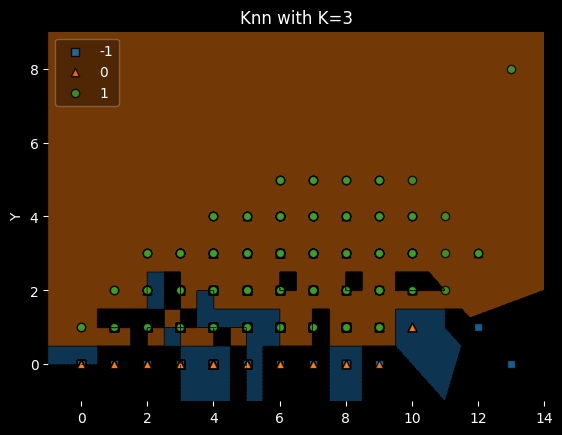

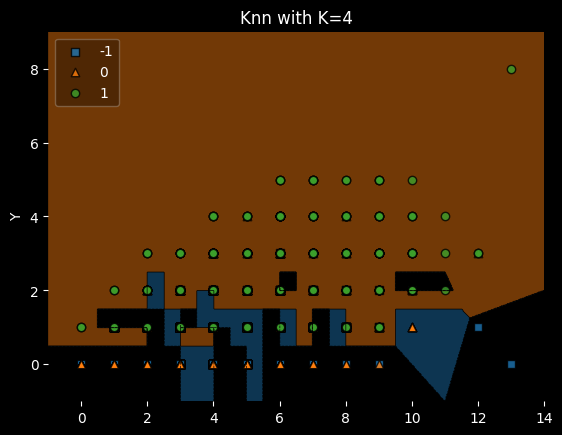

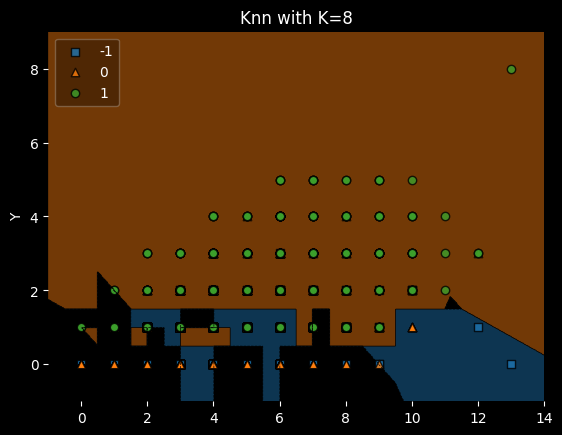

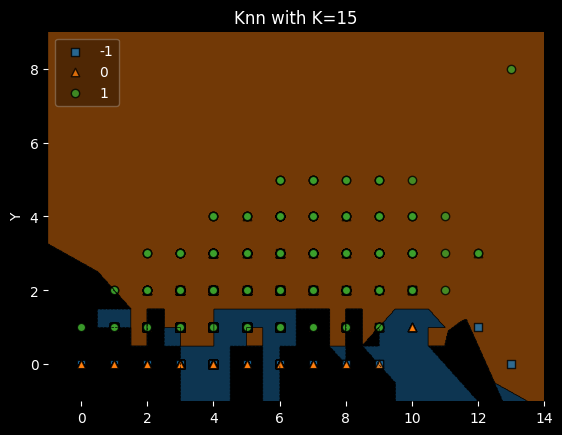

In [54]:
# tengo que poner plot mejor distribuidos en la figura
# aca estamos con una correlacion de 0.47
datos['resultado'] = datos['resultado'].replace({'L': 1, 'E': 0, 'V': -1})

def knn_comparison(datos, k): # funcion de comparacion
 x = datos[['tiros_arco_local','goles_local']].values
 y = datos[['resultado']].values.astype(int)
 y = y.ravel() #aplanar resultados
 clf = neighbors.KNeighborsClassifier(n_neighbors=k) #algoritmo
 clf.fit(x, y)# Graficar la region de decision
 plot_decision_regions(x, y, clf=clf, legend=2)
 plt.ylabel('Y')
 plt.title('Knn with K='+ str(k))
 plt.show()
# Cargar y aplicar funcion

for i in  [1,2,3,4,8,15] : # Para diferentes valores de k (Knn)
    knn_comparison(datos, i)

### Árbol de decisión


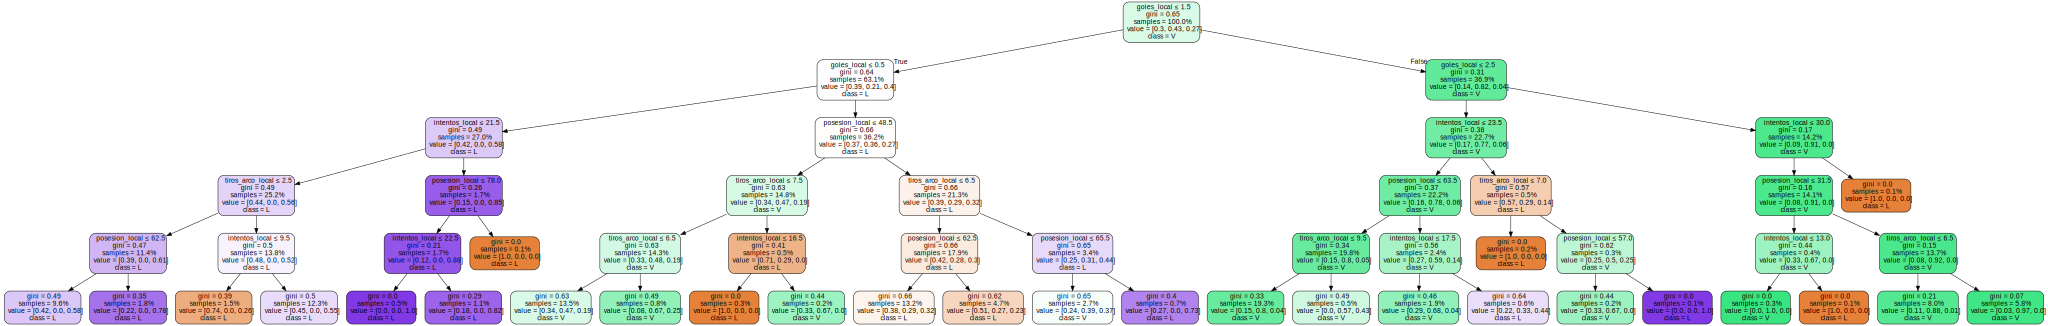

In [84]:
datos['resultado'] = datos['resultado'].replace({1: 'L', 0: 'E', -1: 'V'})
variables_arbol= datos[['tiros_arco_local', 'posesion_local', 'goles_local', 'intentos_local']]
# Cargar los datos
# probando otra cosa abajo
feature_name = variables_arbol

#feature_name = 'tiros_arco_local'
target_column = 'resultado'

#X = datos_nor[feature_name].values
x=feature_name.values
y = datos[target_column].values
# ajustar arbol de decisión simple con hiperparametros (defecto)
clf = DecisionTreeClassifier(random_state=1234,max_depth=5)
model = clf.fit(X, y)
# Exportar el árbol a formato DOT
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=datos_nor.columns,
                           class_names=datos['resultado'],
                           filled=True, rounded=True, special_characters=True,
                           proportion= True, precision=2)


# Ajustar el tamaño del gráfico directamente en el archivo DOT
dot_data = dot_data.replace('size="16,5";', 'size="15,5";')

# Crear un objeto Graphviz desde el formato DOT

graph = graphviz.Source(dot_data, format="png", engine="dot")  # Ajusta el tamaño según sea necesario
image_path = "tree.png"

graph.render(image_path, view=False)

# Mostrar la imagen en el notebook
display(graph)


###Qué aporta el árbol de decisión?

 En este caso, ofrece una aproximación para validar la dirección en la cual se esta aceptando como viable para desarrollar el proyecto que en el que se esta trabajando eficazmente. Es decir, ¿vamos por buen camino? ¿Las variables elegidas para utilizar en el algoritmo de entrenamiento son realmente las que ajustan de manera óptima nuestra predicción? ¿qué ajuste se deberá realizar obligatoriamente a los parámetros planteados en nuestra hípotesis para que, ex-ante al modelo predictivo que  se entrenará, pueda ajustar a la realidad lo mejor posible? ¿Están  correlacionados los atributos seleccionados de manera objetiva?

El índice de Gini mide la impureza del nodo. Un valor de 0 indica que todas las muestras pertenecen a una sola clase, mientras que valores más altos indican mayor impureza.
El valor de samples indica el porcentaje de muestras del conjunto de datos total que se encuentran en este nodo.
El valor de value muestra la proporción de cada clase en el nodo.
La clase mayoritaria en el nodo se indica con class, que se deriban del porcentaje de las muestras de cada nodo y pueden ser los valores dentro de la variable 'resultado' = 'L', 'E' o 'V'.

##Regresion Logística


Accuracy: 0.5947136563876652


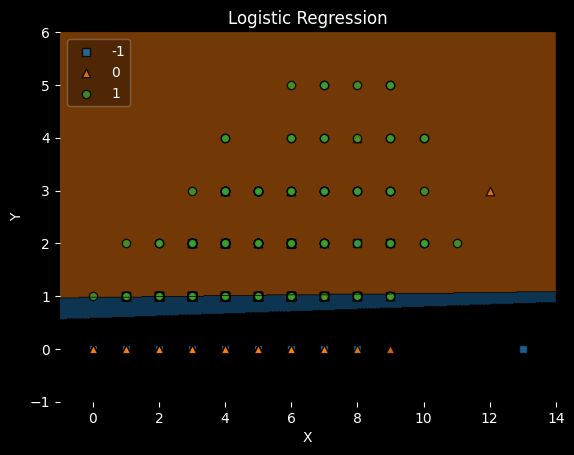

In [56]:
def logistic_regression_comparison(datos):
    x = datos[['tiros_arco_local', 'goles_local']].values
    y = datos['resultado'].values

    # Transformar las clases 'L', 'E', 'V' a números 1, 0, -1 respectivamente
    y = datos['resultado'].replace({'L': 1, 'E': 0, 'V': -1}).values

    # Dividir el conjunto de datos en entrenamiento y prueba
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    # Inicializar y entrenar el modelo de regresión logística
    clf = LogisticRegression(multi_class='ovr', solver='lbfgs')
    clf.fit(x_train, y_train)

    # Calcular la precisión del modelo en el conjunto de prueba
    accuracy = clf.score(x_test, y_test)
    print(f'Accuracy: {accuracy}')

    # Graficar la región de decisión
    plot_decision_regions(x_test, y_test, clf=clf, legend=2)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Logistic Regression')
    plt.show()

# Cargar y aplicar la función
logistic_regression_comparison(datos)

#5- Primeras conclusiones luego de la utilización de dos métodos de aprendisaje supervisado

**A nivel general**

Como primera mención, sin el análisis exigente que será establecido con el transcurso del ciclo del proyecto, cabe destacar la prueba-error de los algoritmos o procesos de bloques de código que se utilizó para comenzar a probar el modelo inicial .
Por el momento el único algoritmo de ML que queda descartado es el que se utiliza para resolver problemas de regresion. Si bien en una primera instancia de estudio se contemplana como de interés principal debido a las previsualizaciones que se habían logrado comparando variables candidatas buscando correlaciones positivas, con líneas de tendencia claras y luego verificado por el método de R cuadrado. Por lo que  se concluye que luego de las pruebas posteriores que el problema a resolver para obtener predicciones sobre la hipótesis planteada, es mediante algoritmos o métodos que se encuentran dentro los llamados de "clasificación".

Desde esta definición se trabajó con un árbol de decisión bastante extenso y sin filtrar variables porque la idea, en este caso, no es utilizarlo como médoto para resolver un pregunta o para tomer en si una decisión parcial o final. El uso de esta técnica fue positivo para visualizar el peso ponderado que tiene el atributo 'L' (Local) en la variable 'resultado' y dentro del conjunto de datos totales que concluyo en una pureza de la información importante medido por el coeficiene de Gini. Lo cual fue sorprendente, porque antes de comenzar este estudio, no se consideró que fuese tan elevado.


**A nivel particular**

Algoritmo K-Nearest-Neighbor (KNN) :
Se consideró utilizar esta herramienta porque ante el problema de identificar patrones de aproximación a una tendencia que indique que cuando se juega un partido de fútbol en Argentina (con los datos de las variables elegidas con correlacion positiva) el resultado se comporte de la manera que estamos investigando, es decir, queremos saber si este método nos permite predecir con un determinado intervalo de confianza, una probabilidad de que gane el equipo local.
Luego de programar el bloque de código con el algoritmo en cuestión, se considera que podrían observarse (en una primera etapa sin un análisis completo)  patrones o conjunto de datos 'vecinos' que visualizando los gráficos de dispersion con los margenes de colores, los cuales establecerían relaciones entre flujos de intereacciones variables estudiadas y resultado 'L'. Pero, no serían a priori determinantes como para elegir este método, sobre todo porque se estan usando un tres variables, y la division por clase ('resultado) , que a criterio del autor el algoritmo tendería a ser ineficiente, comparado con el que se detalla a continuación.

Porque permite analizar la salida del código con la función sigmoide, clave por su ecuación que le asigna un valor entre 0 y 1 y, a mi entender, ayuda a estimar la predicción entre intervalos, que para este caso en el que las variables correlacionadas son en su mayoría datos del tipo entero. De esta forma facilitaría el reconocimiento de los datos ingresados al modelo para que su salida sea mas eficiente.
Por el momento se trendrá que ajustar y seguir haciendo pruebas porque la accuracy es de 0,59. O quizas este método tampoco sea el que mejor se ajuste.


### Apuestas

En los datos utilizados para este proyecto, es importante destacar , que también se detallan variables sobre las apuestas realizadas en cada partido de fútbol de cada campeonato entre el período de tiempo que se obtuvieron los datos del dataframe en cuestión. Estas no forman parte de la primera etapa del modelo porque la estructura de algoritmo entrenable que se necesita usar no las requiere, porque estamos construyendo un proceso en el cual ingresan datos específicos de las variables elegidas para predecir si gana el partido el equipo local. Haciendo referencia sobre características tácticas y/o estratégicas (porcentaje de posesión de pelota por partido), y también de eventos sucedidos con anterioridad (tiros al arco, por ejemplo).
Sin embargo, existen posibilidades que sean útiles para caracterizar tipos de apuesta, relaciones ex-post con análisis por parte de los apostadores sobre los equipos, características estudiadas y otras. Y así contrastarlas con las salidas de modelo predictivo.